In [96]:
import sys

# Add the parent directory to the system path
sys.path.append(r'C:\Users\kaise\OneDrive\Desktop\Codebase\FYP\pkg\utils')

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from motherduckdb_connector import connect_to_motherduckdb

local = False
trained = False
db = connect_to_motherduckdb()

# Data Preparation

In [100]:
# df = pd.read_csv("training_data_v3.csv")
df = db.query_df("SELECT * FROM property_listing")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [102]:
df.to_csv("training_data_v4.csv")

In [103]:
df.columns

Index(['listing_id', 'property_name', 'district', 'price', 'bedroom',
       'bathroom', 'dimensions', 'address', 'price_per_sqft', 'floor_level',
       'furnishing', 'facing', 'built_year', 'tenure', 'property_type', 'url',
       'facilities', 'latitude', 'longitude', 'building_name', 'nearest_mrt',
       'distance_to_mrt_in_m', 'district_id', 'nearest_hawker',
       'distance_to_hawker_in_m', 'nearest_supermarket',
       'distance_to_supermarket_in_m', 'nearest_sch', 'distance_to_sch_in_m',
       'nearest_mall', 'distance_to_mall_in_m', 'is_whole_unit', 'has_pool',
       'has_gym', 'fingerprint', 'source', 'scraped_on', 'last_updated'],
      dtype='object')

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67687 entries, 0 to 67686
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   listing_id                    67687 non-null  object        
 1   property_name                 67687 non-null  object        
 2   district                      67687 non-null  object        
 3   price                         67687 non-null  int32         
 4   bedroom                       67687 non-null  int32         
 5   bathroom                      67687 non-null  int32         
 6   dimensions                    67687 non-null  int32         
 7   address                       67435 non-null  object        
 8   price_per_sqft                67528 non-null  float32       
 9   floor_level                   41977 non-null  object        
 10  furnishing                    67687 non-null  object        
 11  facing                      

In [105]:
df["furnishing"] = df["furnishing"].fillna(df["furnishing"].mode()[0])
df["furnishing"].value_counts()

furnishing
Fully                  30722
Partial                18464
Unfurnished            16333
Fully Furnished         1159
Partially Furnished      984
Flexible                  25
Name: count, dtype: int64

In [106]:
df["facing"] = df["facing"].fillna(df["facing"].mode()[0])
df["facing"].value_counts()

facing
North          64770
South            757
North East       661
South East       532
East             377
South West       287
North West       211
West              89
North South        3
Name: count, dtype: int64

In [107]:
df["floor_level"] = df["floor_level"].fillna(df["floor_level"].mode()[0])
df["floor_level"].value_counts()

floor_level
High            45834
Mid             10451
Low              6483
Ground           1648
Penthouse        1050
High Floor        973
Middle Floor      573
Low Floor         345
Top               225
Ground Floor      105
Name: count, dtype: int64

In [108]:
df["tenure"] = df["tenure"].fillna(df["tenure"].mode()[0])
df["tenure"].value_counts()

tenure
freehold     41839
leasehold    25848
Name: count, dtype: int64

In [109]:
df["property_type"] = df["property_type"].replace("Cluster HouseWhole Unit", "Cluster House")
df["property_type"] = df["property_type"].fillna(df['property_type'].mode()[0])
df["property_type"].value_counts()

property_type
Condo                  32606
HDB                    19947
Apartment               5019
Condominium             3727
Bungalow                1232
Terraced House          1095
Executive Condo         1038
Semi-Detached House      995
Executive HDB            554
Cluster House            397
Corner Terrace           248
Conservation House       229
Walk-up                  204
Shophouse                185
Townhouse                 75
HDB Executive             71
Landed                    65
Name: count, dtype: int64

In [110]:
df["built_year"] = df["built_year"].replace(9999, df["built_year"].median())
df["built_year"].value_counts()

built_year
2009    10665
2015     3146
2016     2594
2023     2490
2017     2086
        ...  
1963        2
2027        2
2026        2
1954        1
1966        1
Name: count, Length: 67, dtype: int64

In [111]:
df["distance_to_mrt_in_m"] = df["distance_to_mrt_in_m"].replace(np.inf, df["distance_to_mrt_in_m"].median())

In [112]:
df["has_pool"] = df["has_pool"].replace(pd.NA, False)
df["has_gym"] = df["has_gym"].replace(pd.NA, False)

C:\Users\kaise\AppData\Local\Temp\ipykernel_6376\2702760226.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["has_pool"] = df["has_pool"].replace(pd.NA, False)
C:\Users\kaise\AppData\Local\Temp\ipykernel_6376\2702760226.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["has_gym"] = df["has_gym"].replace(pd.NA, False)


In [113]:
df.to_csv("training_data_v4_cleaned.csv", index=False)

# EDA

In [114]:
numerical_columns = ["price", "bedroom", "bathroom", "dimensions", "built_year", "distance_to_mrt_in_m", "distance_to_hawker_in_m", "distance_to_supermarket_in_m", "distance_to_sch_in_m", "distance_to_mall_in_m"]
categorical_columns = ["property_type", "furnishing", "floor_level", "district_id", "tenure", "facing"]
df[numerical_columns].describe().transpose()

count         mean           std          min  \
price                         67687.0  4650.497496  20285.177689     1.000000   
bedroom                       67687.0     1.831740      1.212230     1.000000   
bathroom                      67687.0     1.698657      1.142794     1.000000   
dimensions                    67687.0   989.189076   5022.293934     1.000000   
built_year                    67687.0  2003.506981     13.955863  1954.000000   
distance_to_mrt_in_m          67687.0   791.751099  44720.289062     3.361000   
distance_to_hawker_in_m       67687.0  1009.455872  44754.425781     0.052000   
distance_to_supermarket_in_m  67687.0   604.564941  44714.035156     0.010000   
distance_to_sch_in_m          67687.0   887.245178  44748.277344    33.164001   
distance_to_mall_in_m         67687.0   962.608093  44743.664062     0.018000   

                                      25%          50%          75%  \
price                         1500.000000  3550.000000  5000.000000   
bedroom                          1.000000     1.000000     2.000000   
bathroom                         1.000000     1.000000     2.000000   
dimensions                     200.000000   699.000000  1130.000000   
built_year                    1995.000000  2009.000000  2014.000000   
distance_to_mrt_in_m           285.264999   469.000000   722.000000   
distance_to_hawker_in_m        380.806000   644.909973   990.549011   
distance_to_supermarket_in_m   201.675003   319.989990   492.964996   
distance_to_sch_in_m           363.023010   556.518982   824.619995   
distance_to_mall_in_m          331.363007   615.471008  1014.575012   

                                     max  
price                          4150000.0  
bedroom                             10.0  
bathroom                            10.0  
dimensions                     1153513.0  
built_year                        2028.0  
distance_to_mrt_in_m          11536368.0  
distance_to_hawker_in_m       11543109.0  
distance_to_supermarket_in_m  11535154.0  
distance_to_sch_in_m          11542039.0  
distance_to_mall_in_m         11541006.0

In [115]:
df[numerical_columns].corr()["price"].sort_values(ascending=False)

price                           1.000000
bathroom                        0.203584
bedroom                         0.185662
dimensions                      0.141848
built_year                      0.047467
distance_to_sch_in_m            0.000823
distance_to_hawker_in_m         0.000629
distance_to_mall_in_m           0.000423
distance_to_mrt_in_m            0.000410
distance_to_supermarket_in_m    0.000183
Name: price, dtype: float64

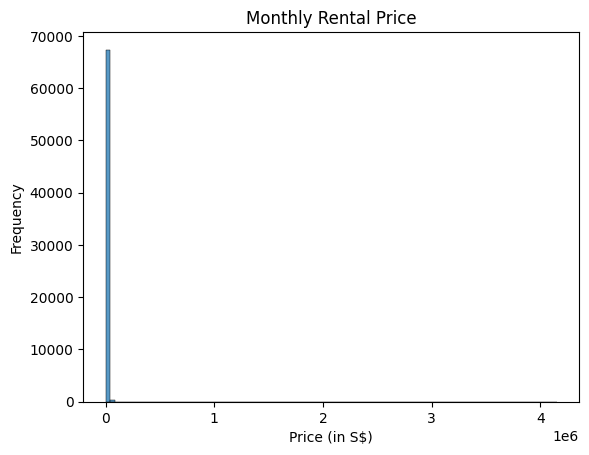

In [116]:
# Create a histogram 
sns.histplot(df["price"], bins=100)

# Add axes labels 
plt.xlabel("Price (in S$)")
plt.ylabel("Frequency")

# Add title
plt.title("Monthly Rental Price")

# Show the plot
plt.show()

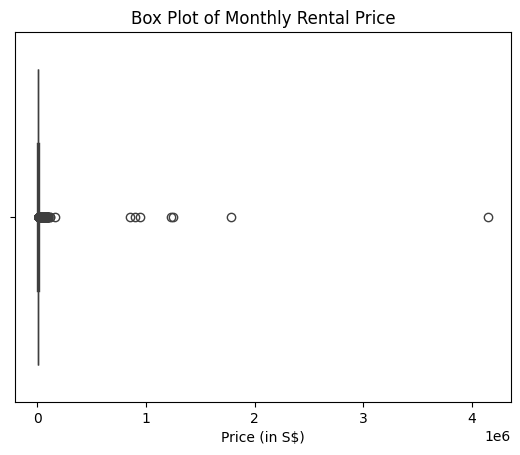

In [117]:
# Create a box and whisker plot
sns.boxplot(x=df["price"])

# Add axes labels 
plt.xlabel("Price (in S$)")
plt.title("Box Plot of Monthly Rental Price")

# Show the plot
plt.show()

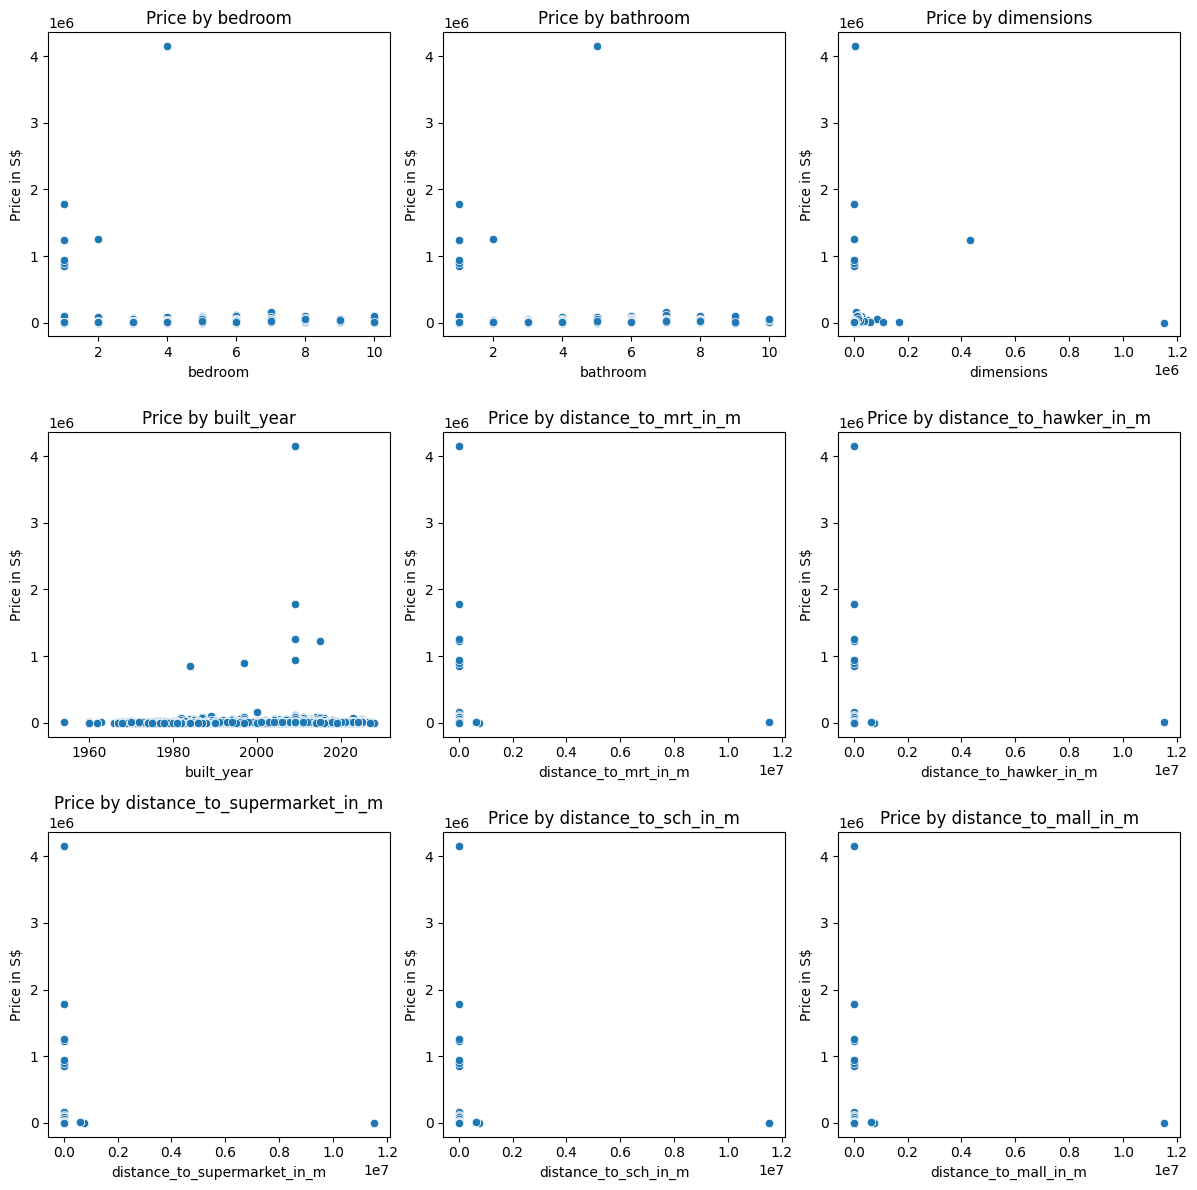

In [118]:
# Set the figure size
plt.figure(figsize=(12, 12))

# Iterate over the numerical columns
for i, col in enumerate(numerical_columns[1:]):
    # Create a subplot in a 3x3 grid, the current subplot is i+1
    plt.subplot(3, 3, i + 1)
    # Create a scatter plot between the current column and price
    sns.scatterplot(data=df, x=col, y="price")
    # Add axis labels
    plt.ylabel("Price in S$")
    plt.xlabel(f"{col}")
    # Add title
    plt.title(f"Price by {col}")

# Adjust subplot layout
plt.tight_layout()

# Show the plot
plt.show()

In [119]:
price_by_bedrooms = df["price"].groupby(df["bedroom"])
price_by_bedrooms.describe()

count          mean           std     min       25%      50%  \
bedroom                                                                   
1        39131.0   2425.079502  13531.570936    90.0   1100.00   1900.0   
2        11944.0   4754.945747  11500.761561     1.0   3800.00   4300.0   
3         9611.0   6440.860160   3186.030518  1100.0   4600.00   5600.0   
4         4253.0  11667.787444  63870.572403   858.0   6499.00   8500.0   
5         1832.0  16187.271288  13247.396554  2100.0   8300.00  11700.0   
6          555.0  21680.535135  17473.933309   990.0   9800.00  16000.0   
7          290.0  26955.500000  20152.755734  6700.0  15000.00  19000.0   
8           50.0  25731.760000  20239.884301  7000.0  12375.00  16800.0   
9            9.0  30444.444444  13029.880190  7000.0  25000.00  28000.0   
10          12.0  41474.833333  25443.278094  8900.0  20249.25  40000.0   

              75%        max  
bedroom                       
1         3300.00  1779000.0  
2         5100.00  1250000.0  
3         7000.00    65000.0  
4        12800.00  4150000.0  
5        18000.00   100000.0  
6        27000.00   120000.0  
7        36000.00   161000.0  
8        31375.00   100000.0  
9        35000.00    48000.0  
10       52999.25    92800.0

In [120]:
# Descriptive statistics of price by property type
price_by_type = df["price"].groupby(df["property_type"])
price_by_type.describe()

count          mean           std     min      25%  \
property_type                                                               
Apartment             5019.0   4277.925085   3381.929960   550.0   2500.0   
Bungalow              1232.0  27155.110390  18670.027675   650.0  14800.0   
Cluster House          397.0   9291.324937   4327.060508  1000.0   7500.0   
Condo                32606.0   4985.322885   8005.336144     1.0   3000.0   
Condominium           3727.0   7219.399517  78240.691497   750.0   3300.0   
Conservation House     229.0   6279.746725   3795.963971   950.0   3200.0   
Corner Terrace         248.0   7202.004032   4815.403470   100.0   2575.0   
Executive Condo       1038.0   3053.141618   1579.058717   550.0   1400.0   
Executive HDB          554.0   3060.835740   1580.425133   500.0   1100.0   
HDB                  19947.0   2060.346318   8848.197916    90.0    900.0   
HDB Executive           71.0   3271.070423   1724.273448   650.0   1125.0   
Landed                  65.0   2659.938462   3706.127329   450.0   1100.0   
Semi-Detached House    995.0   9354.519598   5906.917565   675.0   6800.0   
Shophouse              185.0   3279.983784   3026.801195   550.0   1800.0   
Terraced House        1095.0   5390.608219   4078.052543   500.0   1600.0   
Townhouse               75.0   7986.280000   5062.663829  1200.0   3150.0   
Walk-up                204.0   3418.147059   2572.245251   750.0   1800.0   

                         50%      75%        max  
property_type                                     
Apartment             3900.0   5000.0    75000.0  
Bungalow             19000.0  38000.0   161000.0  
Cluster House         9200.0  11050.0    45000.0  
Condo                 4200.0   5600.0  1233000.0  
Condominium           4299.0   5500.0  4150000.0  
Conservation House    6300.0   7900.0    26000.0  
Corner Terrace        7589.5   9000.0    26500.0  
Executive Condo       3125.0   4300.0    10050.0  
Executive HDB         3800.0   4200.0     6500.0  
HDB                   1200.0   3300.0   900800.0  
HDB Executive         4000.0   4500.0     6388.0  
Landed                1400.0   1700.0    24000.0  
Semi-Detached House   9000.0  12800.0    92005.0  
Shophouse             2500.0   3400.0    28000.0  
Terraced House        6000.0   7800.0    36500.0  
Townhouse             7800.0  11000.0    22000.0  
Walk-up               2600.0   4800.0    28000.0

In [121]:
# Descriptive statistics of price by furnishing
price_by_furnishing = df["price"].groupby(df["furnishing"])
price_by_furnishing.describe()

count         mean            std     min     25%  \
furnishing                                                                 
Flexible                25.0  4992.000000    2092.231663  2800.0  3800.0   
Fully                30722.0  2822.835753    5978.877725     1.0  1150.0   
Fully Furnished       1159.0  7768.474547  124901.411628   750.0  1750.0   
Partial              18464.0  6860.991064    7239.002491   350.0  3600.0   
Partially Furnished    984.0  5965.815041    4795.999474  1000.0  3972.5   
Unfurnished          16333.0  5288.367171   21409.303416   100.0  2600.0   

                        50%     75%        max  
furnishing                                      
Flexible             4900.0  5000.0    11700.0  
Fully                2250.0  3800.0   900800.0  
Fully Furnished      3100.0  4300.0  4150000.0  
Partial              4800.0  7500.0   161000.0  
Partially Furnished  4850.0  6500.0    75000.0  
Unfurnished          3900.0  5499.0  1779000.0

# Outlier Handling

In [122]:
from sklearn.base import BaseEstimator, TransformerMixin

class OutlierHandler2Point5SD(BaseEstimator, TransformerMixin):
    def fit(self, _, y):
        # Calculate mean, standard deviation, and cutoff values of target label (y)
        self.mean = y.mean()
        self.sd = y.std()
        self.lower_cutoff = self.mean - 2.5 * self.sd
        self.upper_cutoff = self.mean + 2.5 * self.sd
        print(f"Lower cutoff: {round(self.lower_cutoff)} S$/month")
        print(f"Upper cutoff: {round(self.upper_cutoff)} S$/month")
        return self

    def transform(self, X, y):
        # Apply cutoff values
        mask = (y >= self.lower_cutoff) & (y <= self.upper_cutoff)
        # Print number of outliers
        print(f"Rental price outliers based on 3 SD: {y.shape[0] - y[mask].shape[0]}")
        # Return data with outliers removed 
        return X[mask], y[mask]

    def fit_transform(self, X, y):
        # Perform both fit and transform 
        return self.fit(X, y).transform(X, y)
    
# Create a custom transformer class to handle outliers based on 1.5 IQR
class OutlierHandlerIQR(BaseEstimator, TransformerMixin):
    def fit(self, X, y):
        # Calculate quartiles, IQR and cutoff values of target label (y) 
        Q1 = y.quantile(0.25)
        Q3 = y.quantile(0.75)
        IQR = Q3 - Q1
        self.lower_cutoff = Q1 - 1.5 * IQR
        self.upper_cutoff = Q3 + 1.5 * IQR
        print(f"Lower cutoff: {round(self.lower_cutoff)} S$/month")
        print(f"Upper cutoff: {round(self.upper_cutoff)} S$/month")
        return self

    def transform(self, X, y):
        # Apply cutoff values 
        mask = (y >= self.lower_cutoff) & (y <= self.upper_cutoff)
        # Print number of outliers
        print(f"Rental price outliers based on 1.5 IQR: {y.shape[0] - y[mask].shape[0]}")
        # Return data with outliers removed 
        return X[mask], y[mask]

    def fit_transform(self, X, y):
        # Perform both fit and transform
        return self.fit(X, y).transform(X, y)

In [123]:
train_df = df[numerical_columns + categorical_columns]
train_df = train_df[train_df["price"] > 0]

# Model Training

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# split data into train and test
rental_price = train_df['price']
X = train_df.drop(['price'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, rental_price, test_size=0.2)

column_transformer = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), [col for col in numerical_columns if col != "price"]),
        ("encoder", OneHotEncoder(drop=None, sparse_output=False), categorical_columns)
    ],
    remainder="passthrough"  # Include the boolean columns without transformation
)

## Train-Validation-Test Split (80-10-10)

In [125]:
# Split the data into training and temporary sets (80% train, 20% temporary)
X_train, X_temp, y_train, y_temp = train_test_split(X, rental_price, test_size=0.2, random_state=42)

# Split the temporary data into validation and test sets (50% each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [126]:
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(54149, 15) (54149,) (6769, 15) (6769,) (6769, 15) (6769,)


In [127]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, HistGradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn import metrics
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import pandas as pd
import tensorflow as tf


## Considered models

In [128]:
models = [
    (LinearRegression(), "LinearRegression"), 
    (Lasso(alpha=1.0), "Lasso"),
    (Ridge(), "Ridge"),
    (DecisionTreeRegressor(), "DecisionTreeRegressor"),
    # MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000),
    # SVR(C = 100),
    (RandomForestRegressor(), "RandomForestRegressor"),
    (AdaBoostRegressor(), "AdaBoostRegressor"),
    (HistGradientBoostingRegressor(), "HistGradientBoostingRegressor"),
    (XGBRegressor(), "XGBRegressor"),
    (CatBoostRegressor(), "CatBoostRegressor"),
    (LGBMRegressor(), "LGBMRegressor"),
]

In [129]:
outlier_handlers = [
    None,
    OutlierHandler2Point5SD(), 
    OutlierHandlerIQR()
]

In [130]:
def get_metrics(model, y_test, y_pred):
    model_results = {}
    model_results['model'] = model
    model_results['mae'] = metrics.mean_absolute_error(y_test, y_pred).round(2)
    model_results['rmse'] = np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(2)
    model_results['r2_score'] = metrics.r2_score(y_test, y_pred).round(2)
    return model_results

In [131]:
# Helper function to create residual plots
def plot_residuals(y, y_pred):
    # Calculate residuals
    residuals = [actual_value - predicted_value for actual_value, predicted_value in zip(y, y_pred)]

    # Create a 1x2 grid of subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=150)

    # Plot 1: Predicted vs. Actual Prices
    axes[0].scatter(y, y_pred)
    axes[0].plot([min(y), max(y)], 
                 [min(y), max(y)], 
                 color="red", 
                 linestyle="--", 
                 label="Perfect Prediction")  # Add diagonal reference line
    axes[0].set_xlabel("Actual Prices")
    axes[0].set_ylabel("Predicted Prices")
    axes[0].set_title("Predicted vs. Actual Prices")
    axes[0].grid(True)
    axes[0].legend() 

    # Plot 2: Residuals vs. Actual Prices
    axes[1].scatter(y, residuals)
    axes[1].axhline(y=0, color="red", linestyle="--", label="Perfect Prediction")  # Add horizontal reference line
    axes[1].set_xlabel("Actual Prices")
    axes[1].set_ylabel("Residuals")
    axes[1].set_title("Residuals vs. Actual Prices")
    axes[1].grid(True)
    axes[1].legend() 

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

Model: LinearRegression
Outlier handling: None
{'model': 'LinearRegression', 'mae': 1713.28, 'rmse': 3332.91, 'r2_score': 0.63}


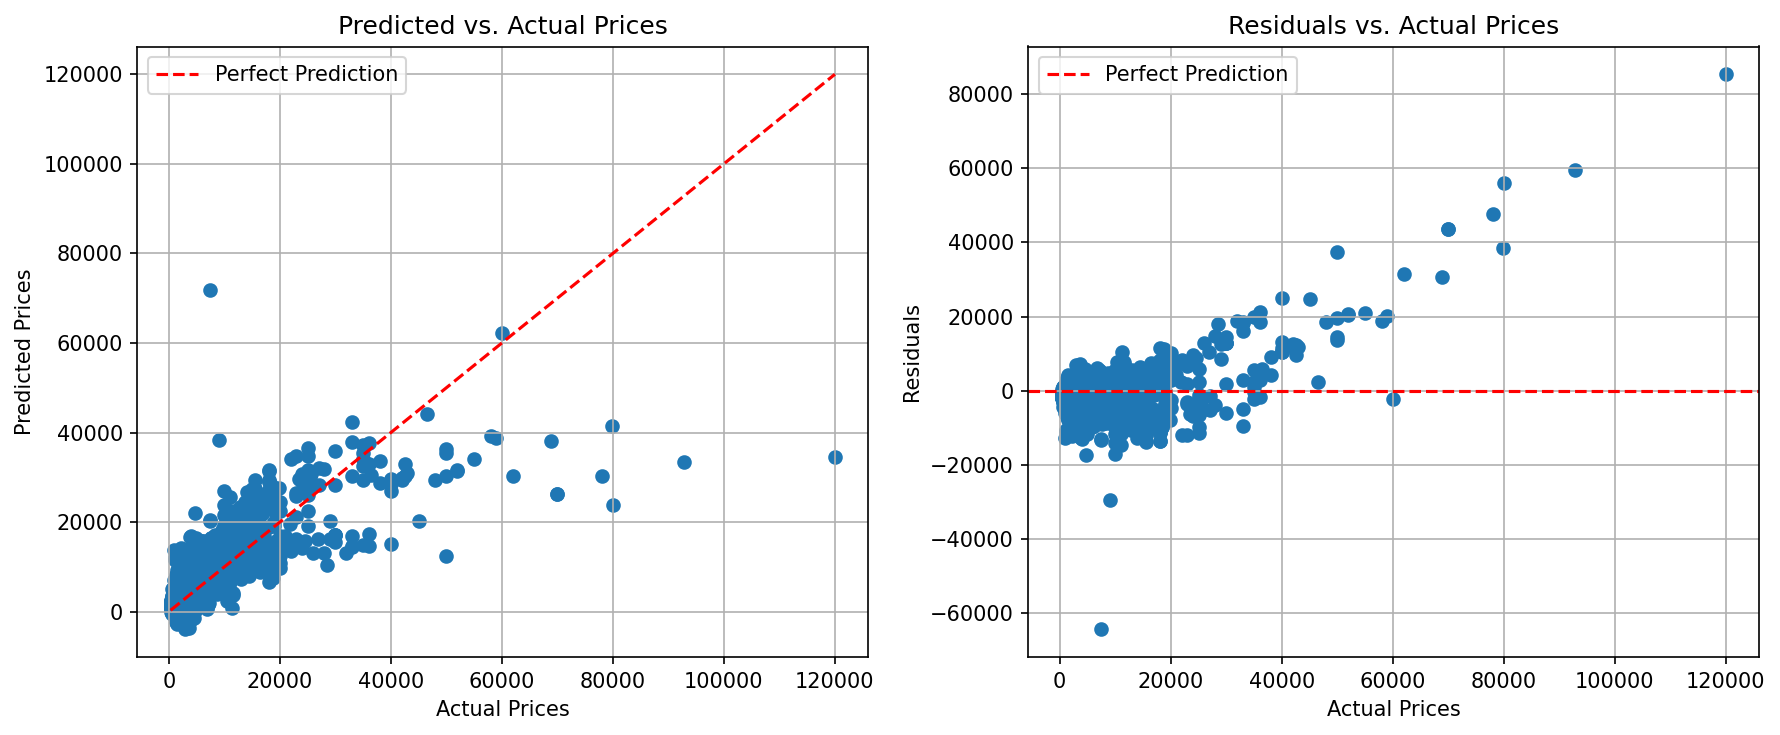

Model: Lasso
Outlier handling: None


c:\Users\kaise\OneDrive\Desktop\Codebase\FYP\ml_venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.254e+11, tolerance: 2.659e+09
  model = cd_fast.enet_coordinate_descent(


{'model': 'Lasso', 'mae': 1704.64, 'rmse': 3338.46, 'r2_score': 0.63}


Model: Ridge
Outlier handling: None
{'model': 'Ridge', 'mae': 1711.06, 'rmse': 3335.56, 'r2_score': 0.63}


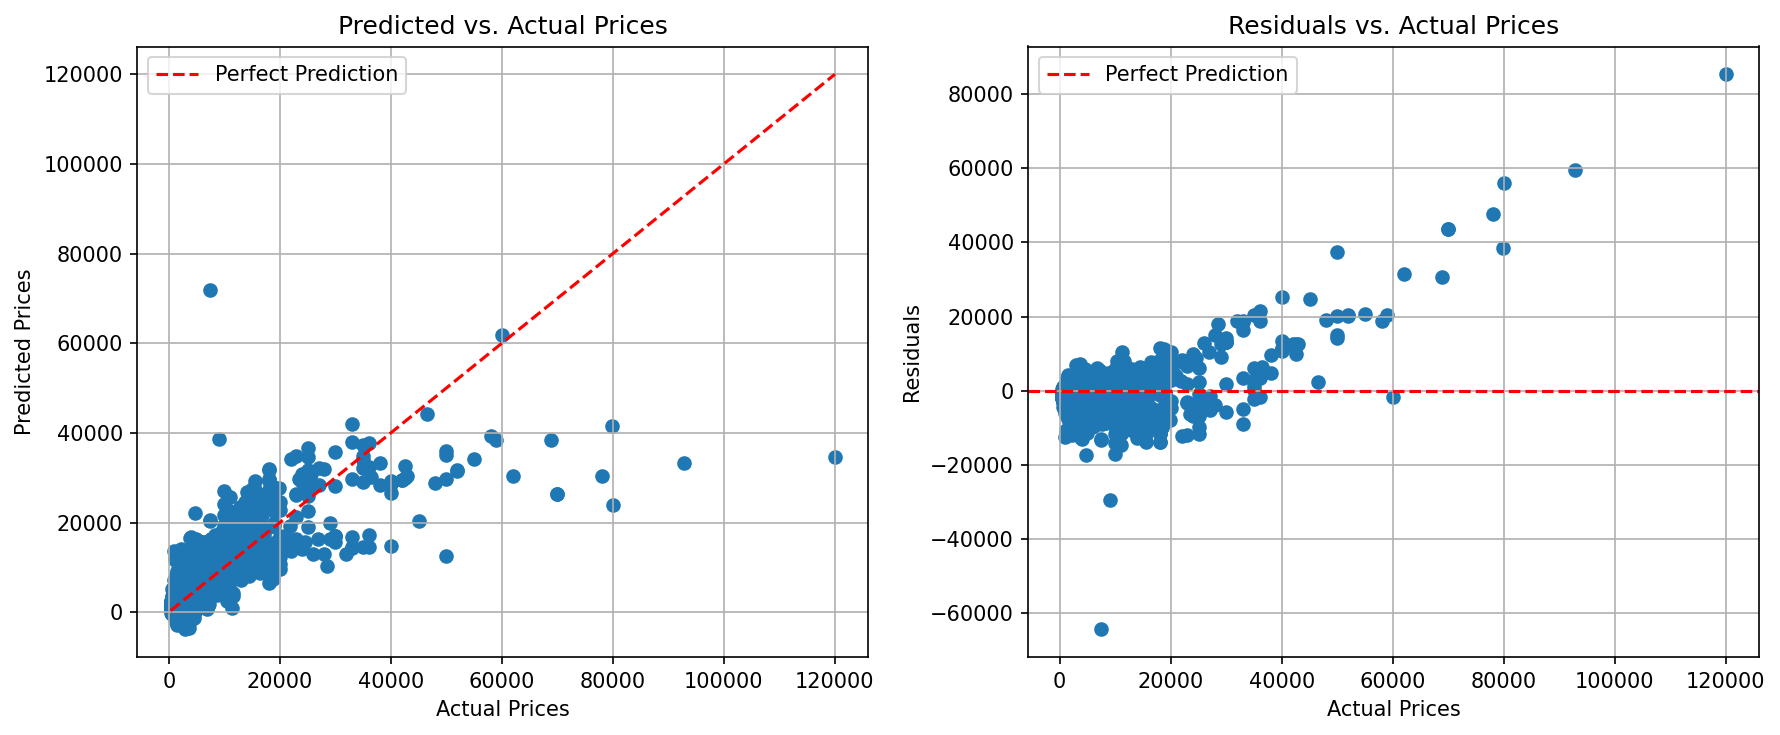

Model: DecisionTreeRegressor
Outlier handling: None
{'model': 'DecisionTreeRegressor', 'mae': 631.53, 'rmse': 2672.37, 'r2_score': 0.76}


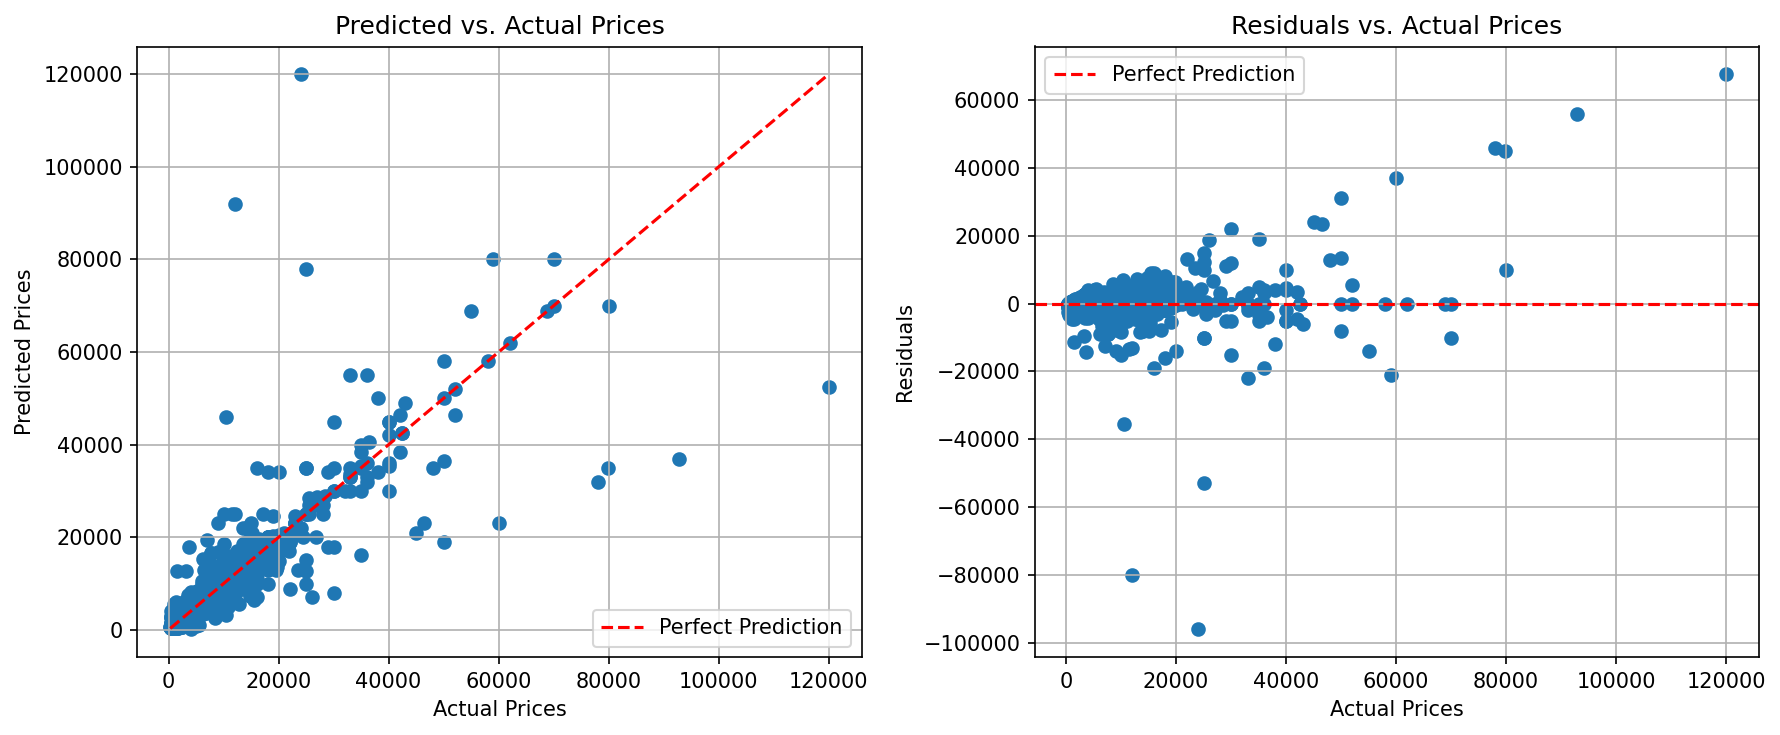

Model: RandomForestRegressor
Outlier handling: None
{'model': 'RandomForestRegressor', 'mae': 507.05, 'rmse': 2062.18, 'r2_score': 0.86}


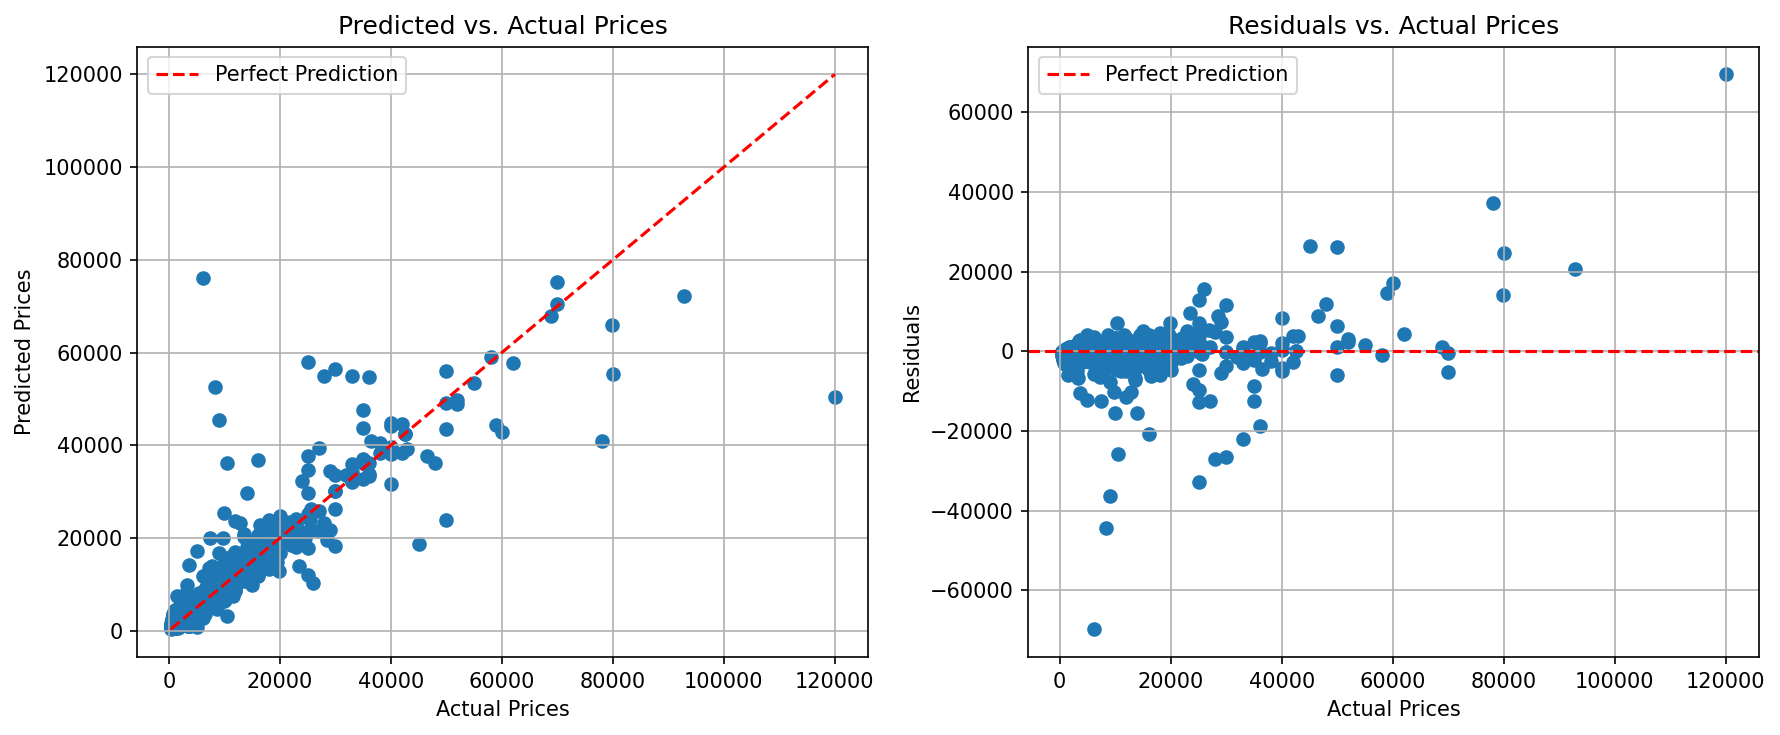

Model: AdaBoostRegressor
Outlier handling: None
{'model': 'AdaBoostRegressor', 'mae': 106427.76, 'rmse': 146270.39, 'r2_score': -712.1}


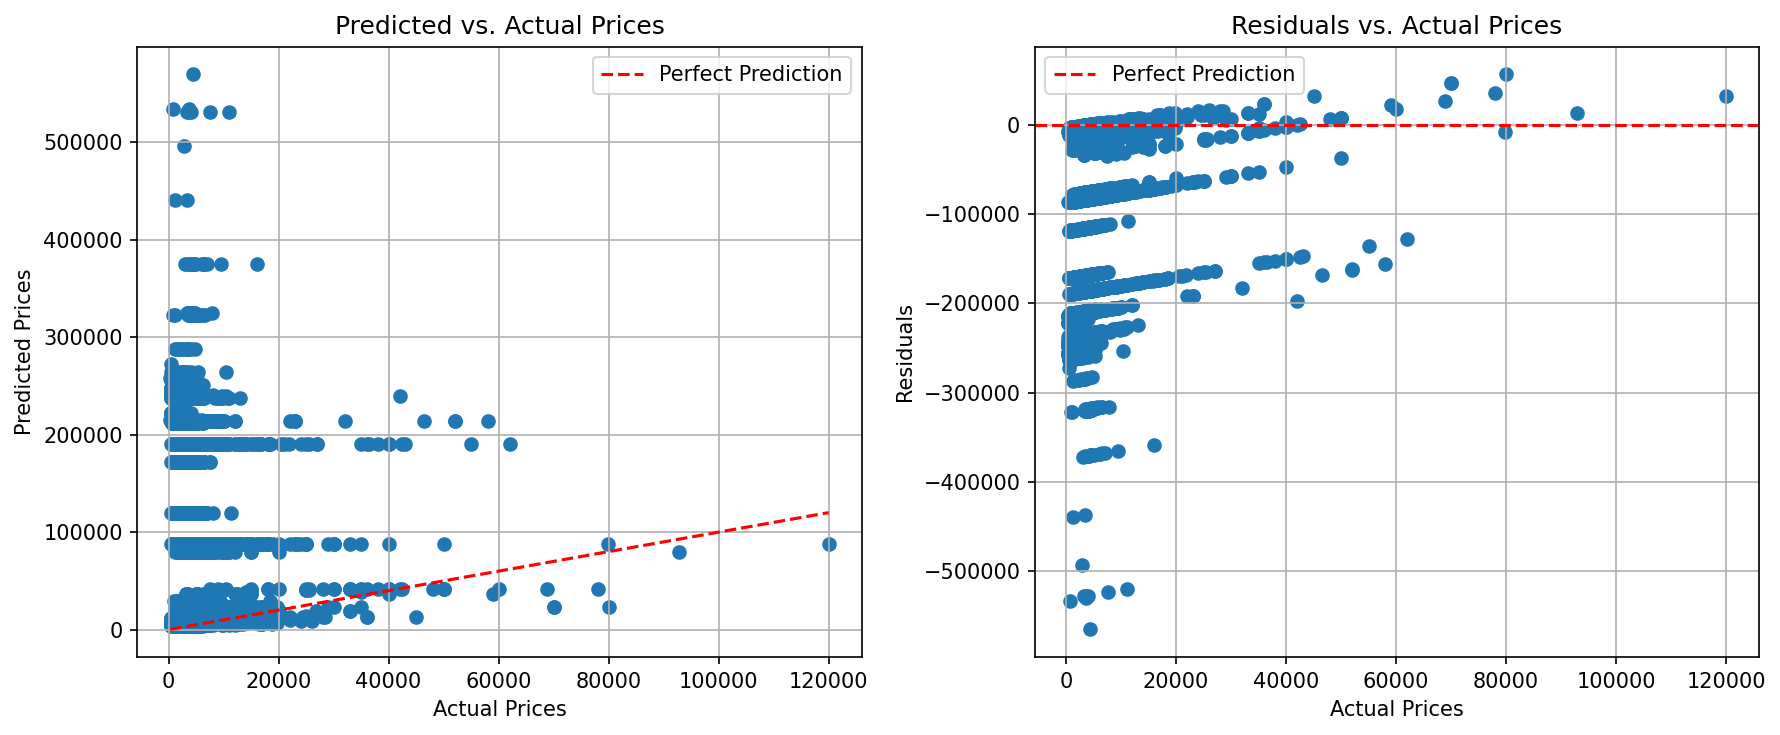

Model: HistGradientBoostingRegressor
Outlier handling: None
{'model': 'HistGradientBoostingRegressor', 'mae': 1031.29, 'rmse': 3165.42, 'r2_score': 0.67}


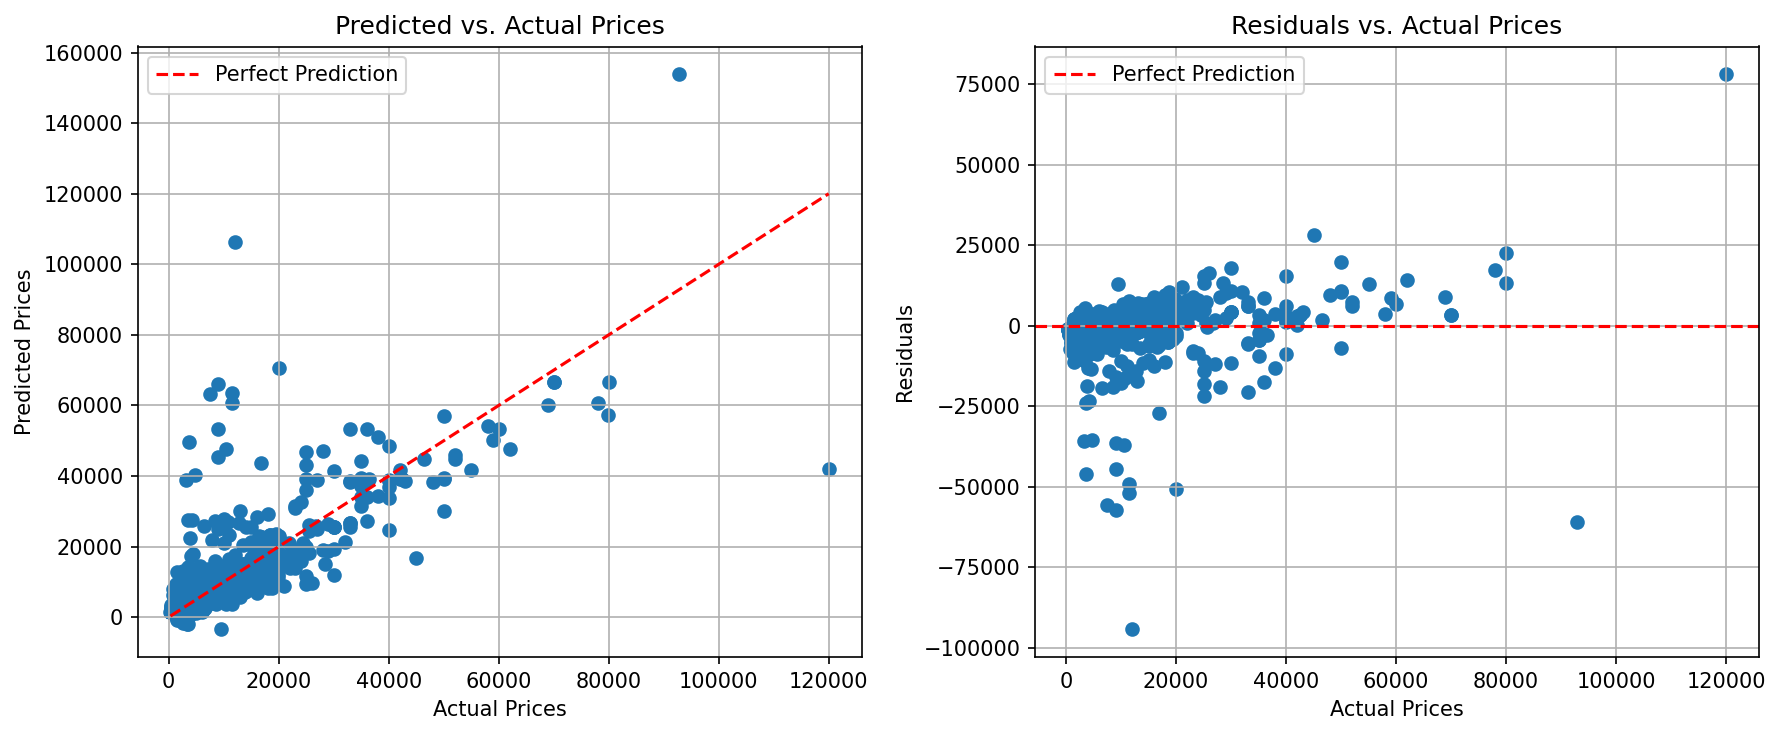

Model: XGBRegressor
Outlier handling: None
{'model': 'XGBRegressor', 'mae': 739.53, 'rmse': 4423.63, 'r2_score': 0.35}


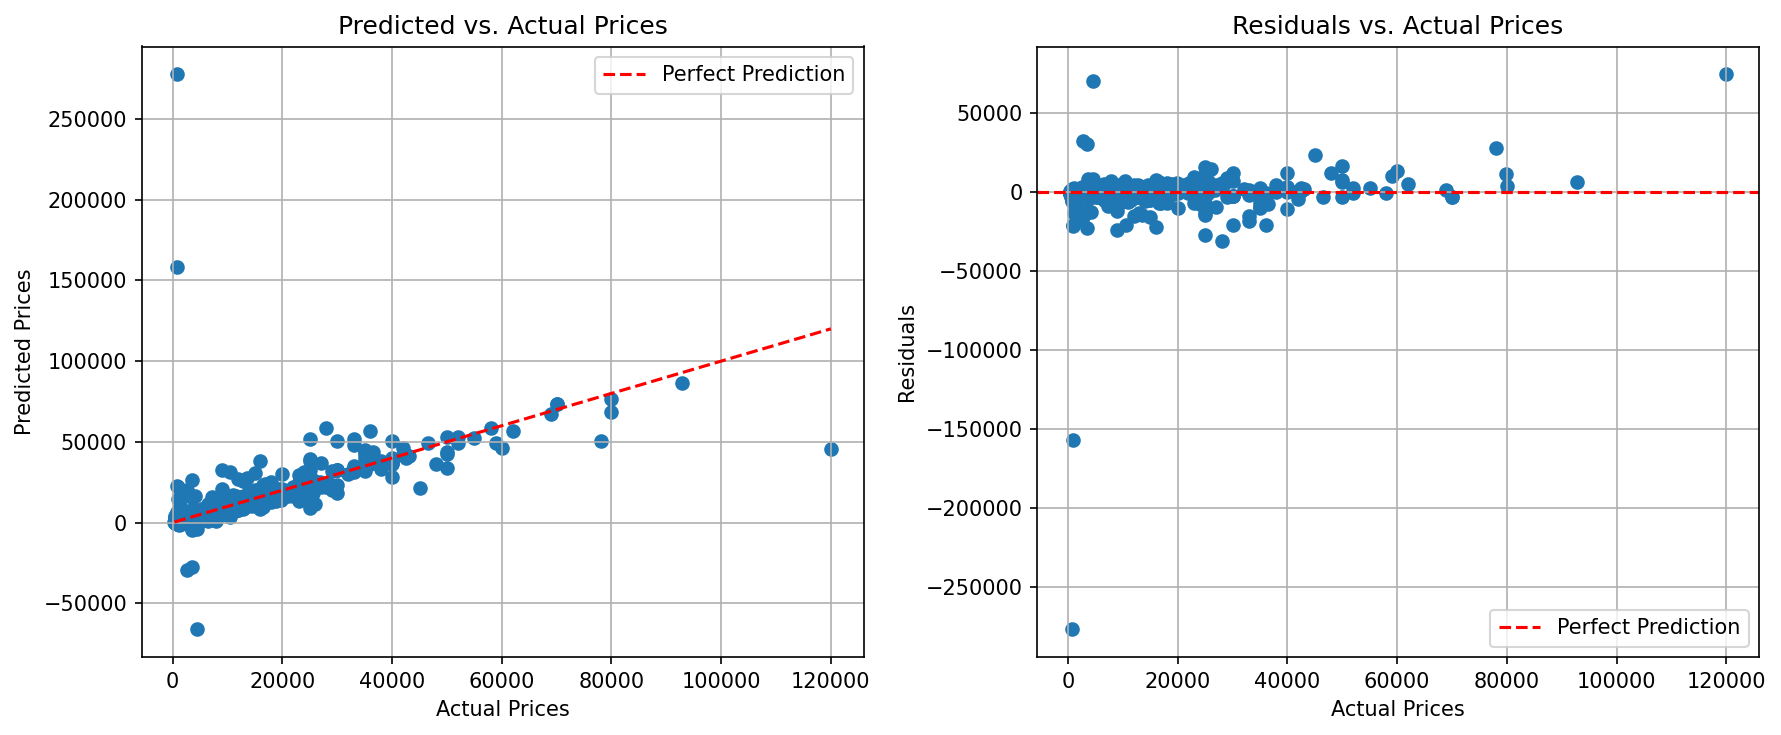

Model: CatBoostRegressor
Outlier handling: None
Learning rate set to 0.076928
0:	learn: 21819.0745397	total: 8.46ms	remaining: 8.46s
1:	learn: 21507.7273180	total: 14.2ms	remaining: 7.07s
2:	learn: 21210.0875076	total: 19.9ms	remaining: 6.6s
3:	learn: 20917.8609148	total: 26.4ms	remaining: 6.57s
4:	learn: 20642.0506179	total: 31.8ms	remaining: 6.33s
5:	learn: 20371.0169940	total: 37.6ms	remaining: 6.23s
6:	learn: 20109.8325282	total: 44.7ms	remaining: 6.34s
7:	learn: 19864.0189882	total: 50.5ms	remaining: 6.26s
8:	learn: 19616.9434142	total: 57.8ms	remaining: 6.37s
9:	learn: 19561.1016860	total: 64.1ms	remaining: 6.34s
10:	learn: 19466.9504285	total: 70.1ms	remaining: 6.3s
11:	learn: 19232.2901574	total: 79ms	remaining: 6.51s
12:	learn: 19186.4242308	total: 86.3ms	remaining: 6.55s
13:	learn: 18960.7482772	total: 95.4ms	remaining: 6.72s
14:	learn: 18710.8327874	total: 139ms	remaining: 9.13s
15:	learn: 18670.4096471	total: 159ms	remaining: 9.76s
16:	learn: 18456.3631556	total: 170ms	rema

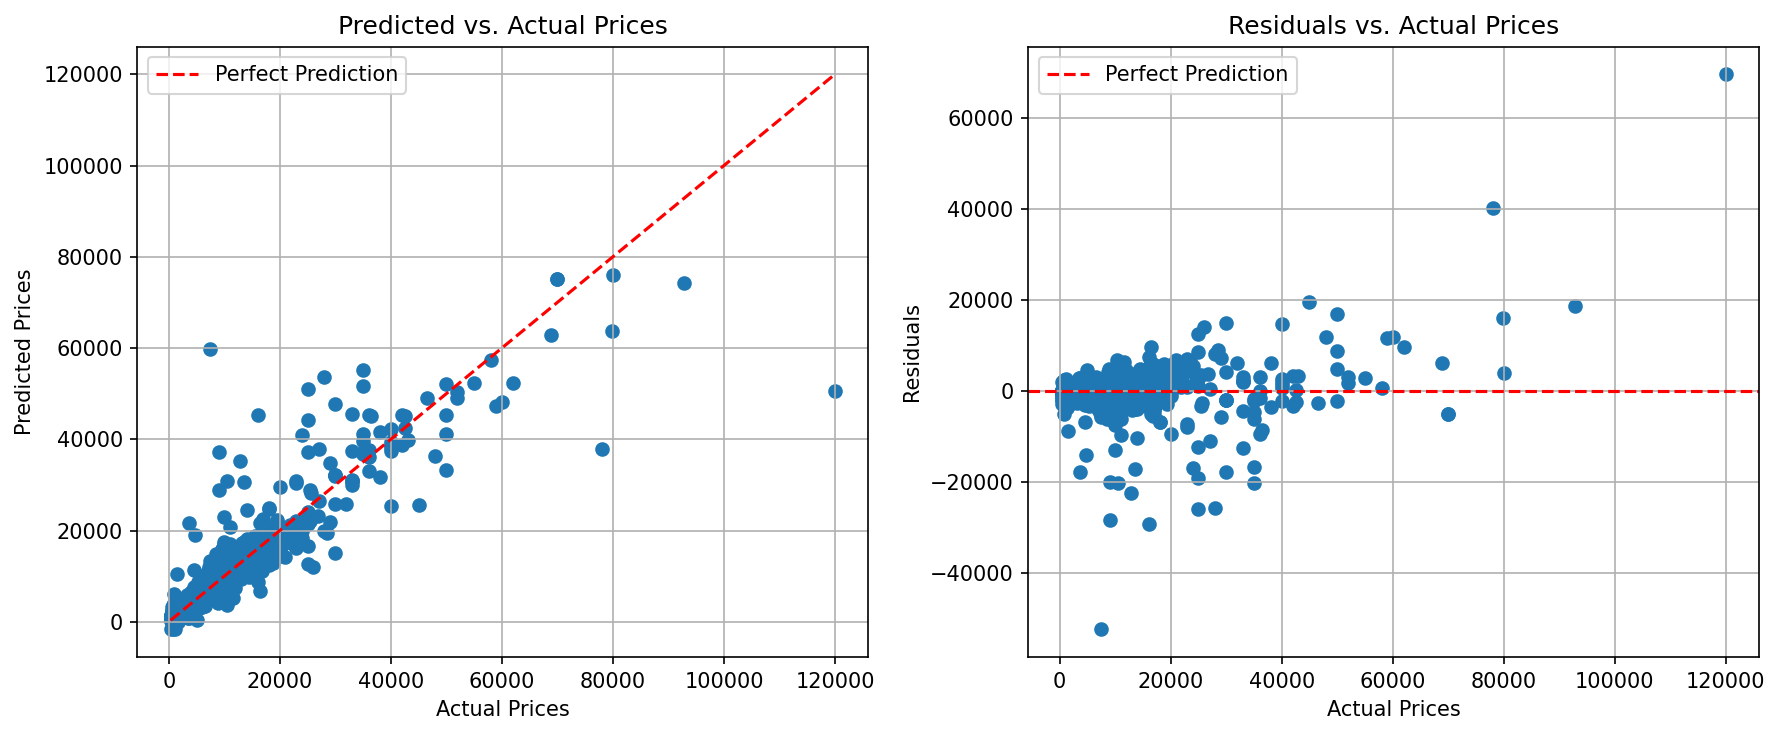

Model: LGBMRegressor
Outlier handling: None
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1755
[LightGBM] [Info] Number of data points in the train set: 54149, number of used features: 79
[LightGBM] [Info] Start training from score 4690.246265
{'model': 'LGBMRegressor', 'mae': 1026.99, 'rmse': 4054.07, 'r2_score': 0.45}


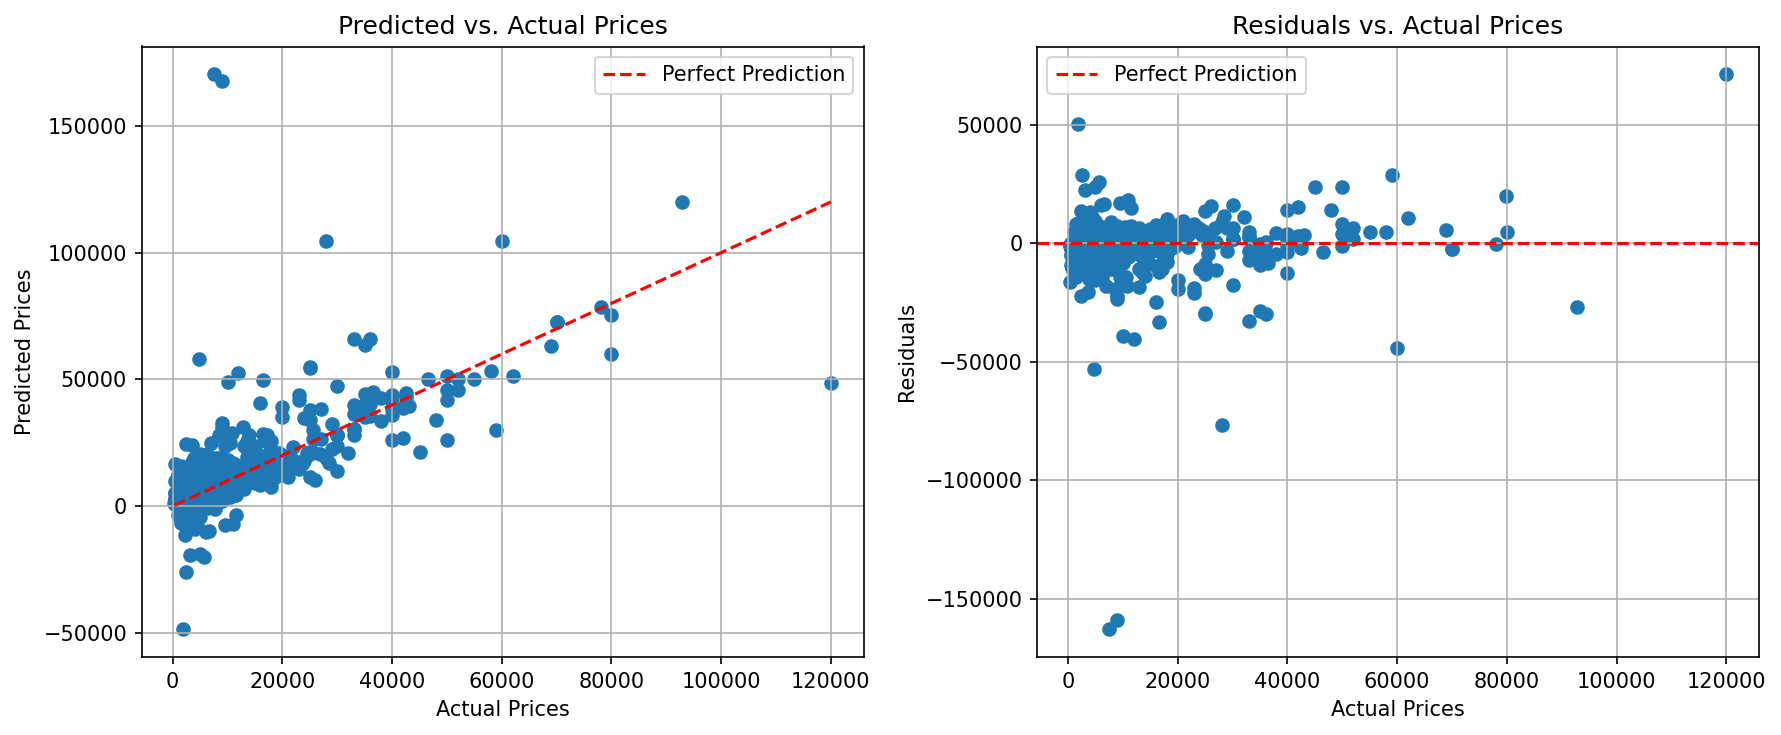

Model: LinearRegression
Outlier handling: OutlierHandler2Point5SD()
Lower cutoff: -50712 S$/month
Upper cutoff: 60093 S$/month
Rental price outliers based on 3 SD: 72
Rental price outliers based on 3 SD: 9
{'model': 'LinearRegression', 'mae': 1374.51, 'rmse': 2373.07, 'r2_score': 0.74}


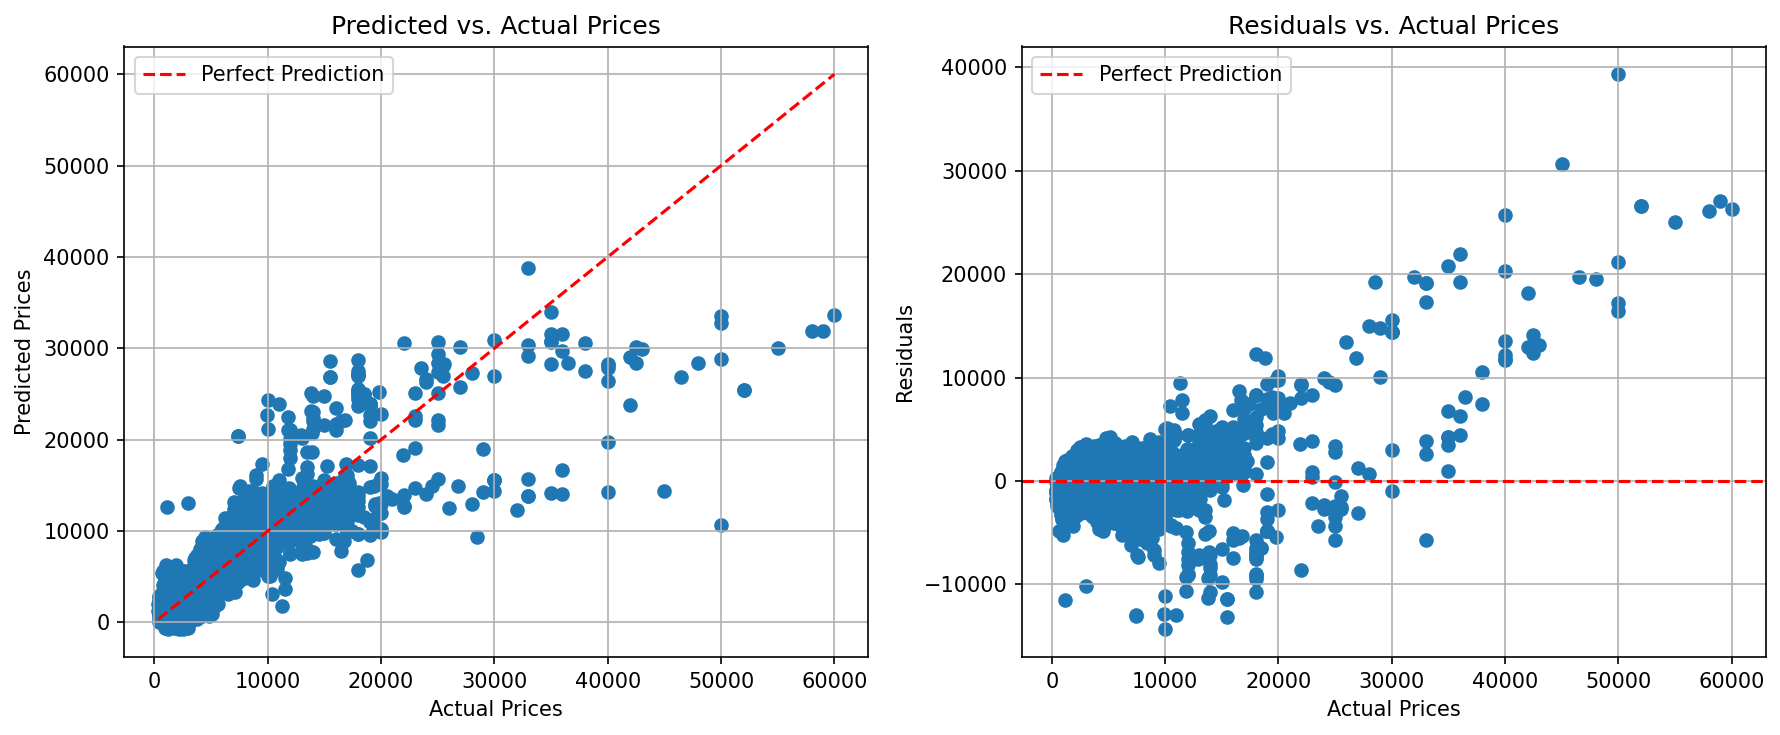

Model: Lasso
Outlier handling: OutlierHandler2Point5SD()
Lower cutoff: -50712 S$/month
Upper cutoff: 60093 S$/month
Rental price outliers based on 3 SD: 72
Rental price outliers based on 3 SD: 9


c:\Users\kaise\OneDrive\Desktop\Codebase\FYP\ml_venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.384e+10, tolerance: 1.312e+08
  model = cd_fast.enet_coordinate_descent(


{'model': 'Lasso', 'mae': 1376.74, 'rmse': 2418.19, 'r2_score': 0.73}


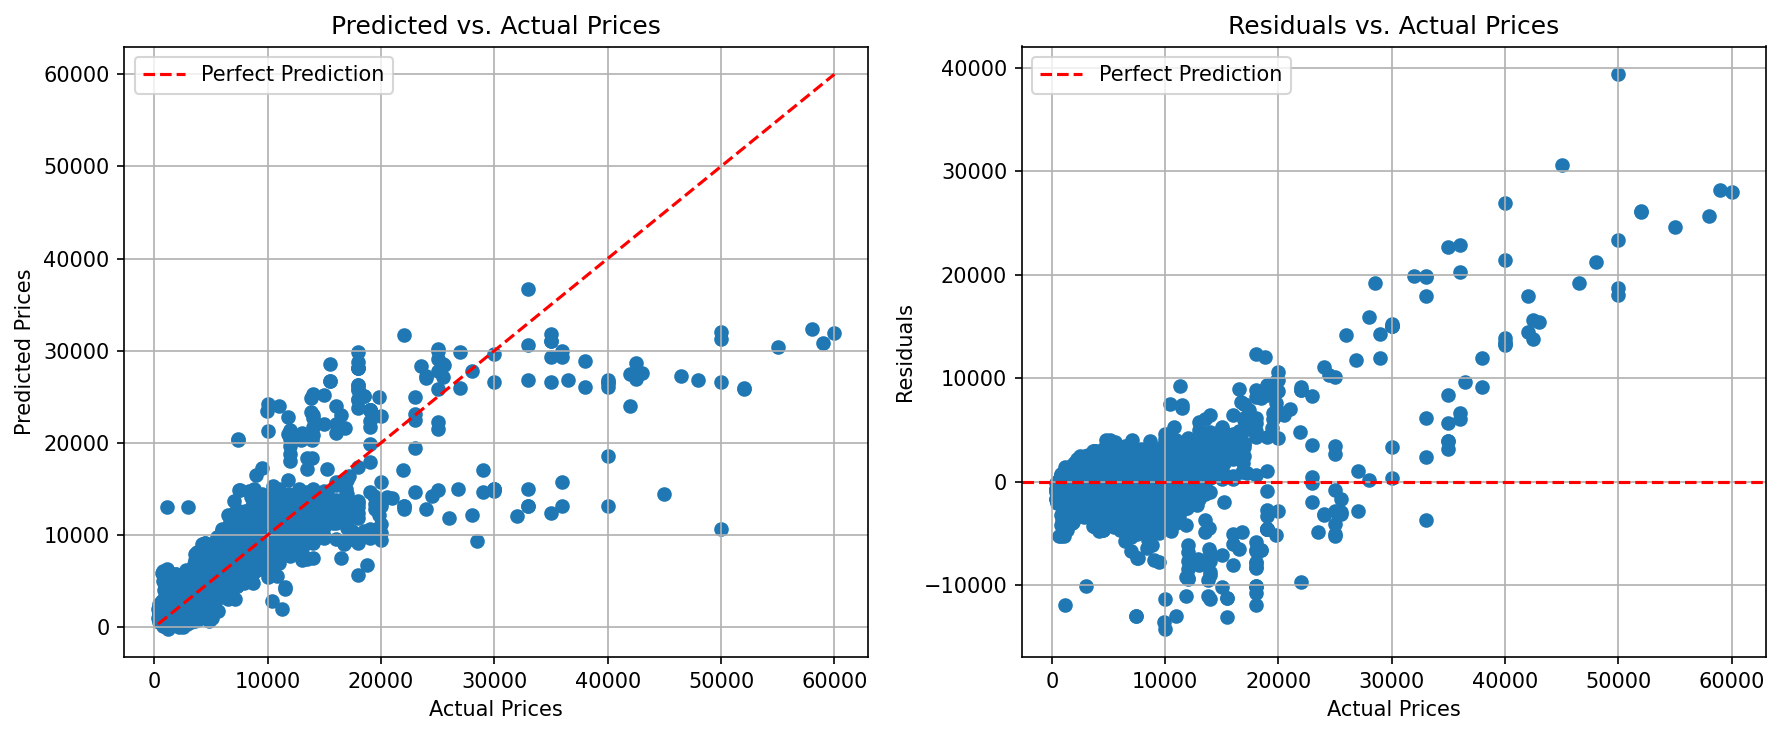

Model: Ridge
Outlier handling: OutlierHandler2Point5SD()
Lower cutoff: -50712 S$/month
Upper cutoff: 60093 S$/month
Rental price outliers based on 3 SD: 72
Rental price outliers based on 3 SD: 9
{'model': 'Ridge', 'mae': 1369.69, 'rmse': 2381.35, 'r2_score': 0.74}


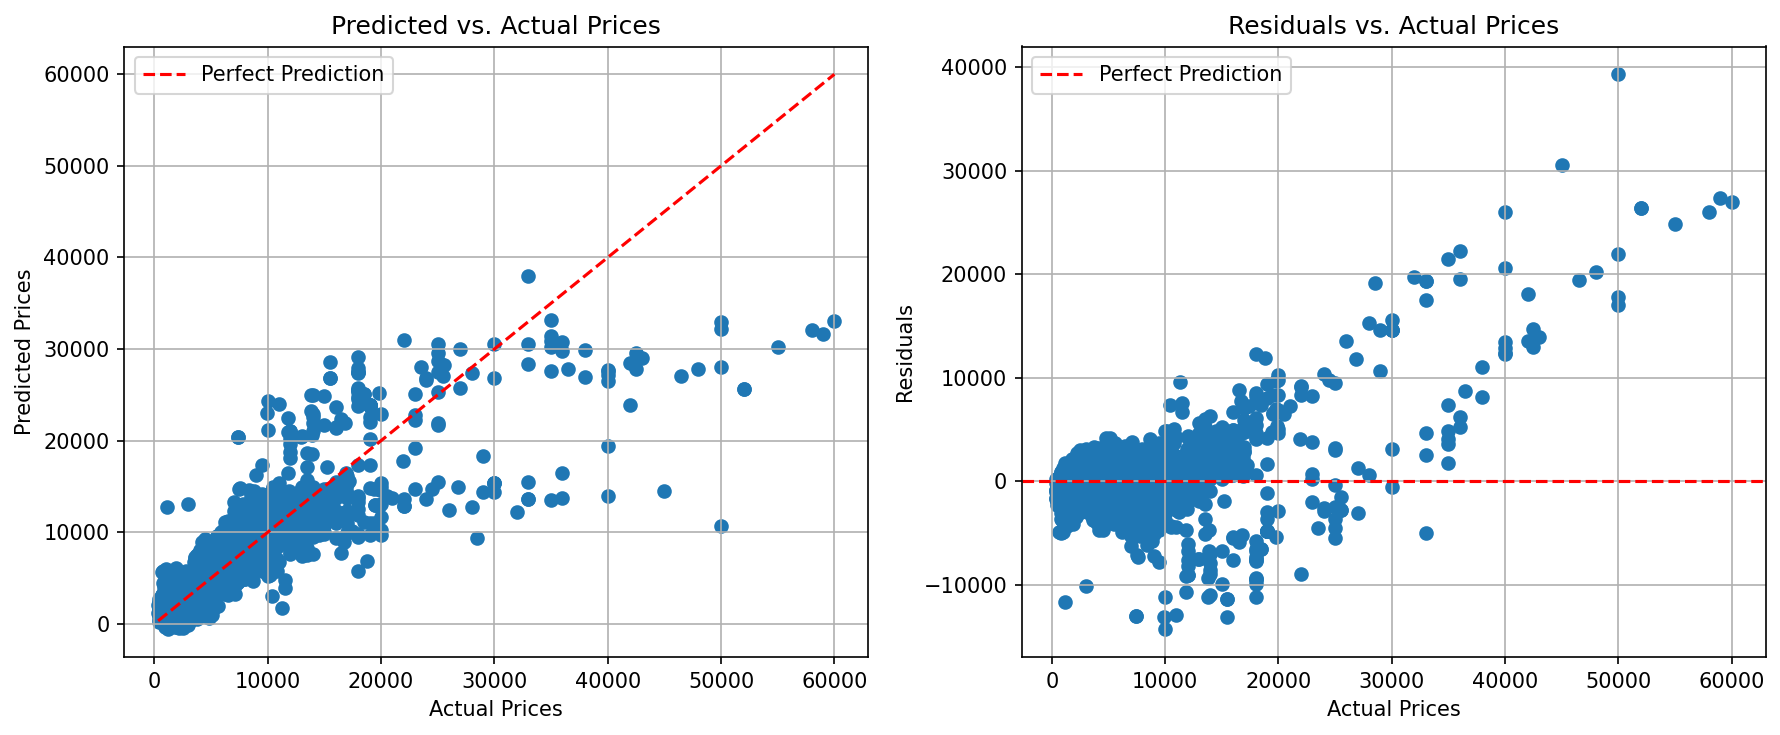

Model: DecisionTreeRegressor
Outlier handling: OutlierHandler2Point5SD()
Lower cutoff: -50712 S$/month
Upper cutoff: 60093 S$/month
Rental price outliers based on 3 SD: 72
Rental price outliers based on 3 SD: 9
{'model': 'DecisionTreeRegressor', 'mae': 565.18, 'rmse': 1770.66, 'r2_score': 0.86}


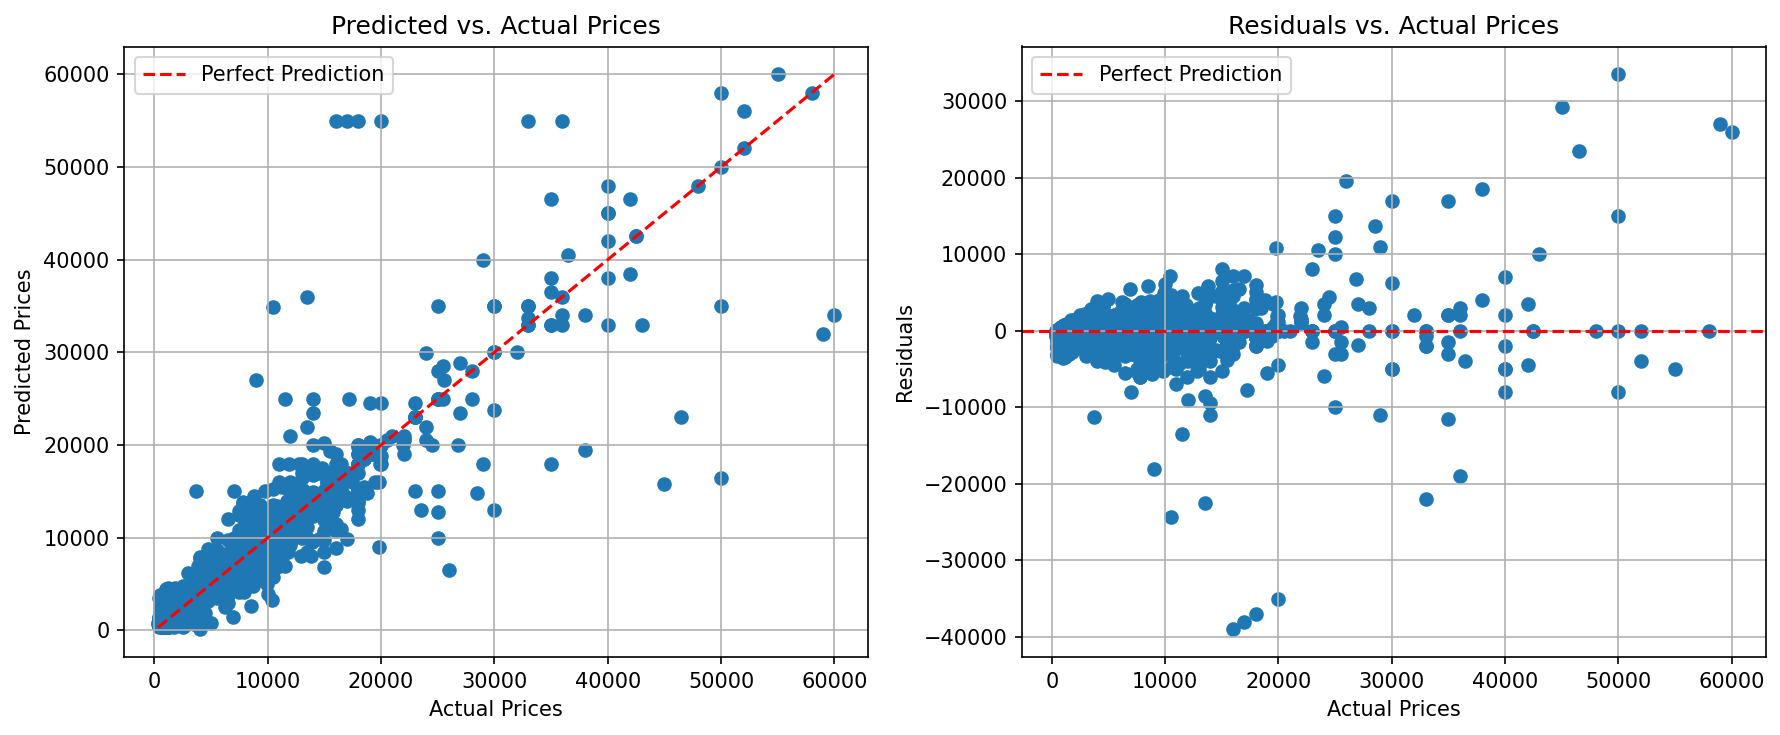

Model: RandomForestRegressor
Outlier handling: OutlierHandler2Point5SD()
Lower cutoff: -50712 S$/month
Upper cutoff: 60093 S$/month
Rental price outliers based on 3 SD: 72
Rental price outliers based on 3 SD: 9
{'model': 'RandomForestRegressor', 'mae': 446.89, 'rmse': 1270.37, 'r2_score': 0.93}


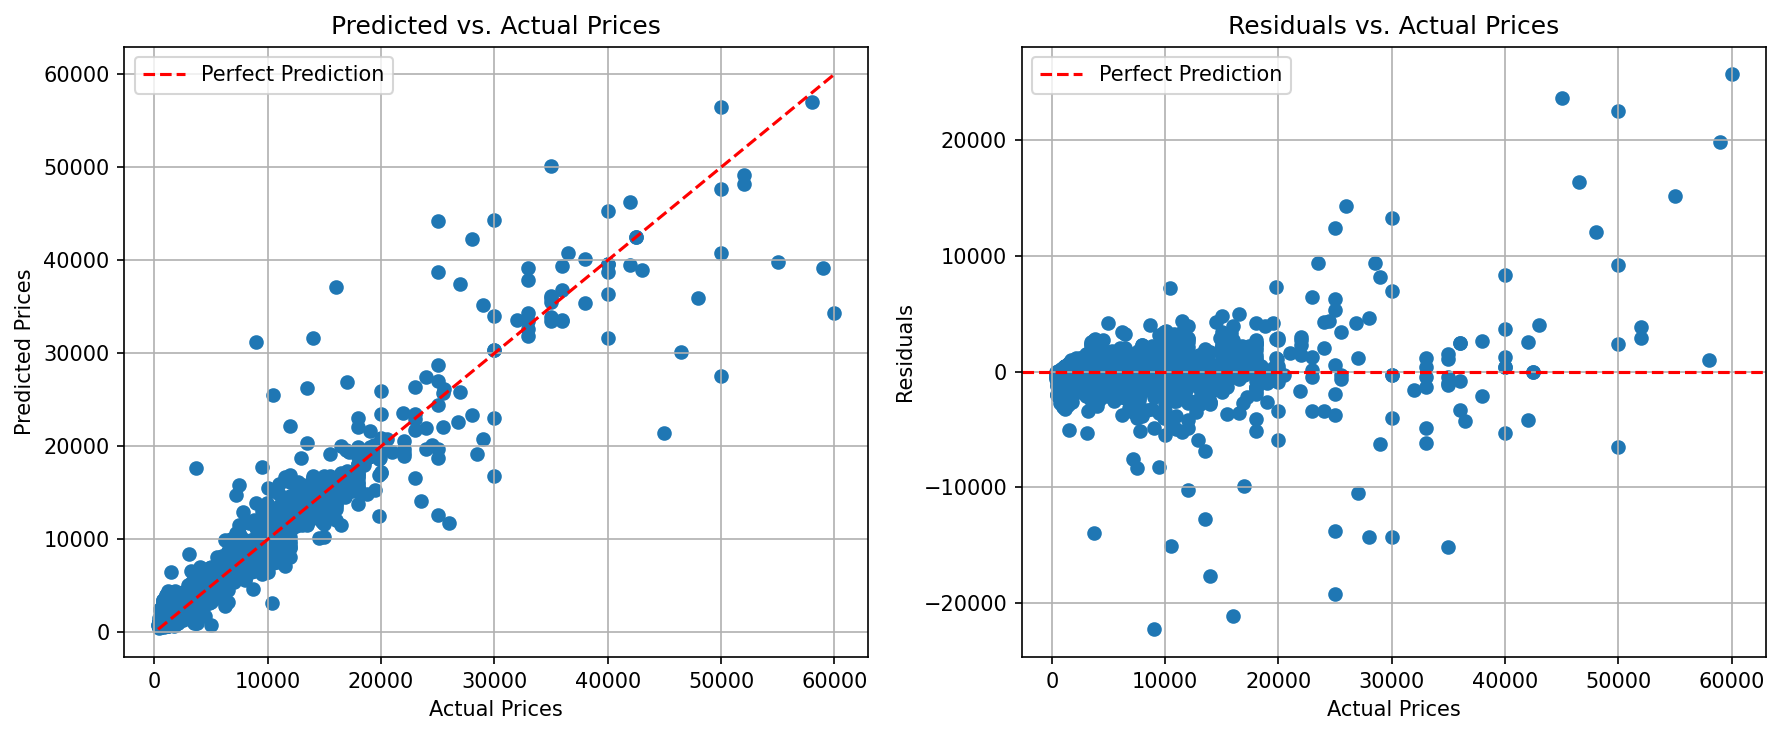

Model: AdaBoostRegressor
Outlier handling: OutlierHandler2Point5SD()
Lower cutoff: -50712 S$/month
Upper cutoff: 60093 S$/month
Rental price outliers based on 3 SD: 72
Rental price outliers based on 3 SD: 9
{'model': 'AdaBoostRegressor', 'mae': 1428.94, 'rmse': 2480.29, 'r2_score': 0.72}


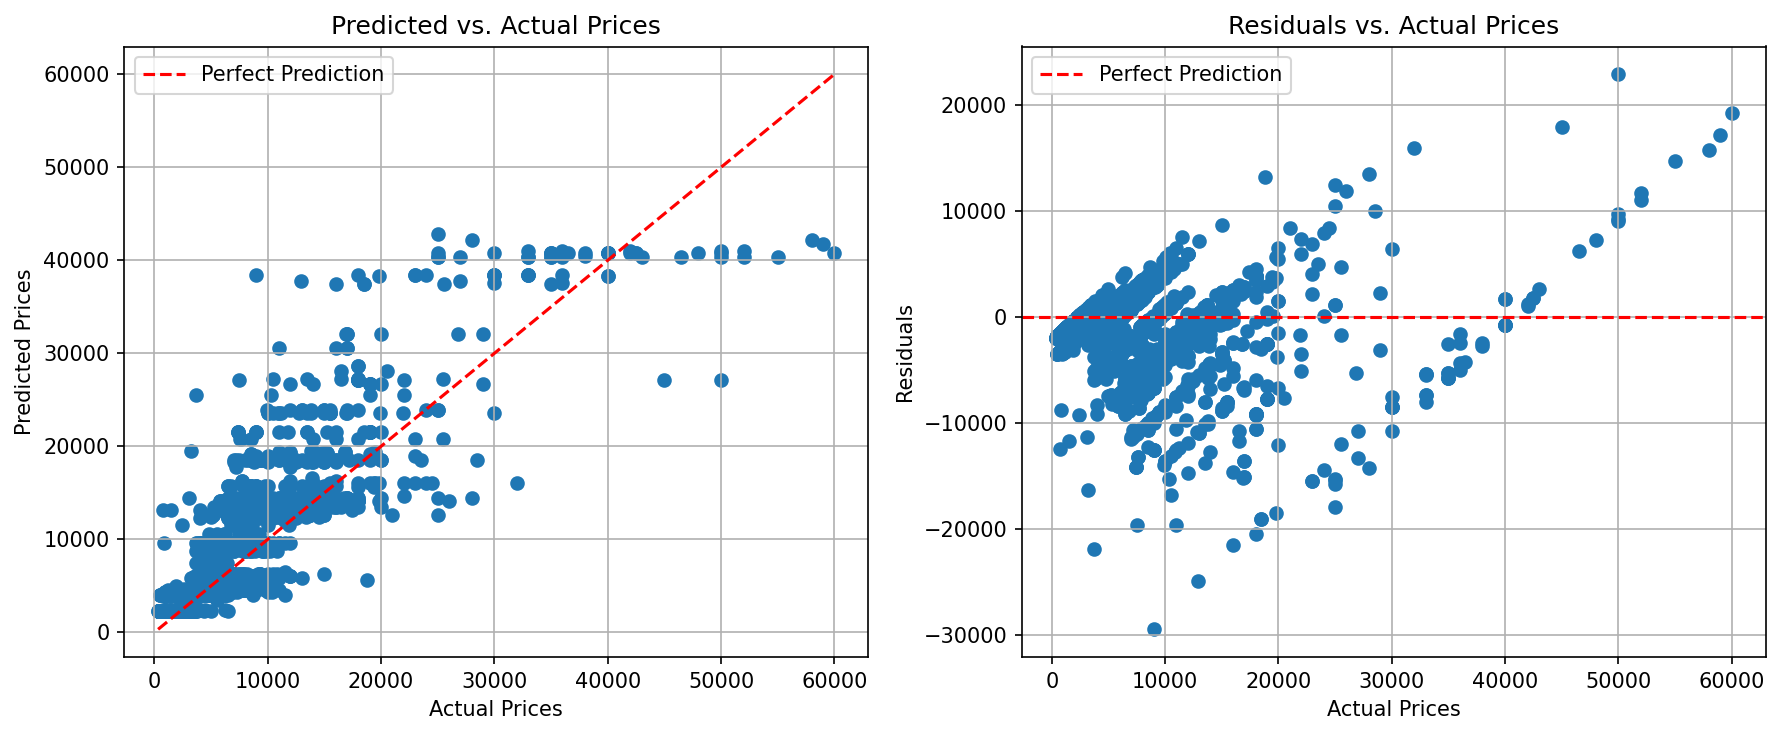

Model: HistGradientBoostingRegressor
Outlier handling: OutlierHandler2Point5SD()
Lower cutoff: -50712 S$/month
Upper cutoff: 60093 S$/month
Rental price outliers based on 3 SD: 72
Rental price outliers based on 3 SD: 9
{'model': 'HistGradientBoostingRegressor', 'mae': 558.82, 'rmse': 1314.61, 'r2_score': 0.92}


Model: XGBRegressor
Outlier handling: OutlierHandler2Point5SD()
Lower cutoff: -50712 S$/month
Upper cutoff: 60093 S$/month
Rental price outliers based on 3 SD: 72
Rental price outliers based on 3 SD: 9
{'model': 'XGBRegressor', 'mae': 507.84, 'rmse': 1218.86, 'r2_score': 0.93}


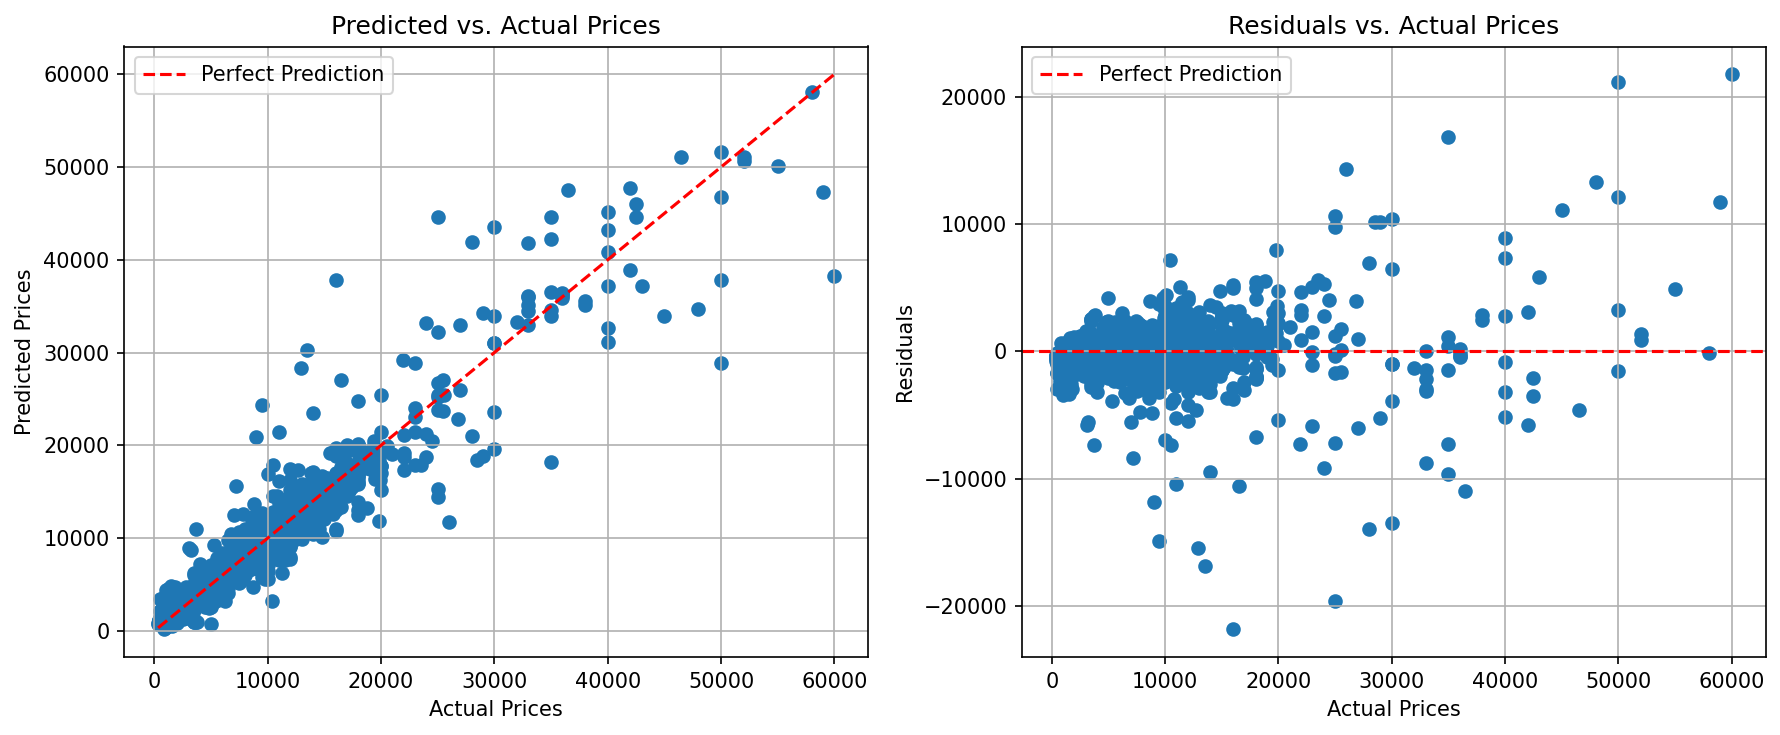

Model: CatBoostRegressor
Outlier handling: OutlierHandler2Point5SD()
Lower cutoff: -50712 S$/month
Upper cutoff: 60093 S$/month
Rental price outliers based on 3 SD: 72
Rental price outliers based on 3 SD: 9
Learning rate set to 0.076912
0:	learn: 4649.9097305	total: 9.2ms	remaining: 9.19s
1:	learn: 4400.9976022	total: 18.9ms	remaining: 9.44s
2:	learn: 4172.3622054	total: 28.3ms	remaining: 9.41s
3:	learn: 3965.9222440	total: 36ms	remaining: 8.96s
4:	learn: 3771.0228950	total: 43.2ms	remaining: 8.59s
5:	learn: 3595.3059344	total: 52.4ms	remaining: 8.69s
6:	learn: 3438.4081646	total: 60.3ms	remaining: 8.56s
7:	learn: 3291.5697319	total: 67.7ms	remaining: 8.39s
8:	learn: 3155.4923035	total: 75ms	remaining: 8.26s
9:	learn: 3031.1713384	total: 82.9ms	remaining: 8.2s
10:	learn: 2921.7455077	total: 90.7ms	remaining: 8.15s
11:	learn: 2819.5630570	total: 99.2ms	remaining: 8.17s
12:	learn: 2723.1524732	total: 106ms	remaining: 8.01s
13:	learn: 2636.7047513	total: 114ms	remaining: 8.01s
14:	learn: 

Model: LGBMRegressor
Outlier handling: OutlierHandler2Point5SD()
Lower cutoff: -50712 S$/month
Upper cutoff: 60093 S$/month
Rental price outliers based on 3 SD: 72
Rental price outliers based on 3 SD: 9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1755
[LightGBM] [Info] Number of data points in the train set: 54077, number of used features: 79
[LightGBM] [Info] Start training from score 4413.753518
{'model': 'LGBMRegressor', 'mae': 559.42, 'rmse': 1278.95, 'r2_score': 0.93}


Model: LinearRegression
Outlier handling: OutlierHandlerIQR()
Lower cutoff: -3750 S$/month
Upper cutoff: 10250 S$/month
Rental price outliers based on 1.5 IQR: 3345
Rental price outliers based on 1.5 IQR: 420
{'model': 'LinearRegression', 'mae': 861.53, 'rmse': 1067.29, 'r2_score': 0.75}


Model: Lasso
Outlier handling: OutlierHandlerIQR()
Lower cutoff: -3750 S$/month
Upper cutoff: 10250 S$/month
Rental price outliers based on 1.5 IQR: 3345
Rental price outliers based on 1.5 IQR: 420
{'model': 'Lasso', 'mae': 866.33, 'rmse': 1068.91, 'r2_score': 0.75}


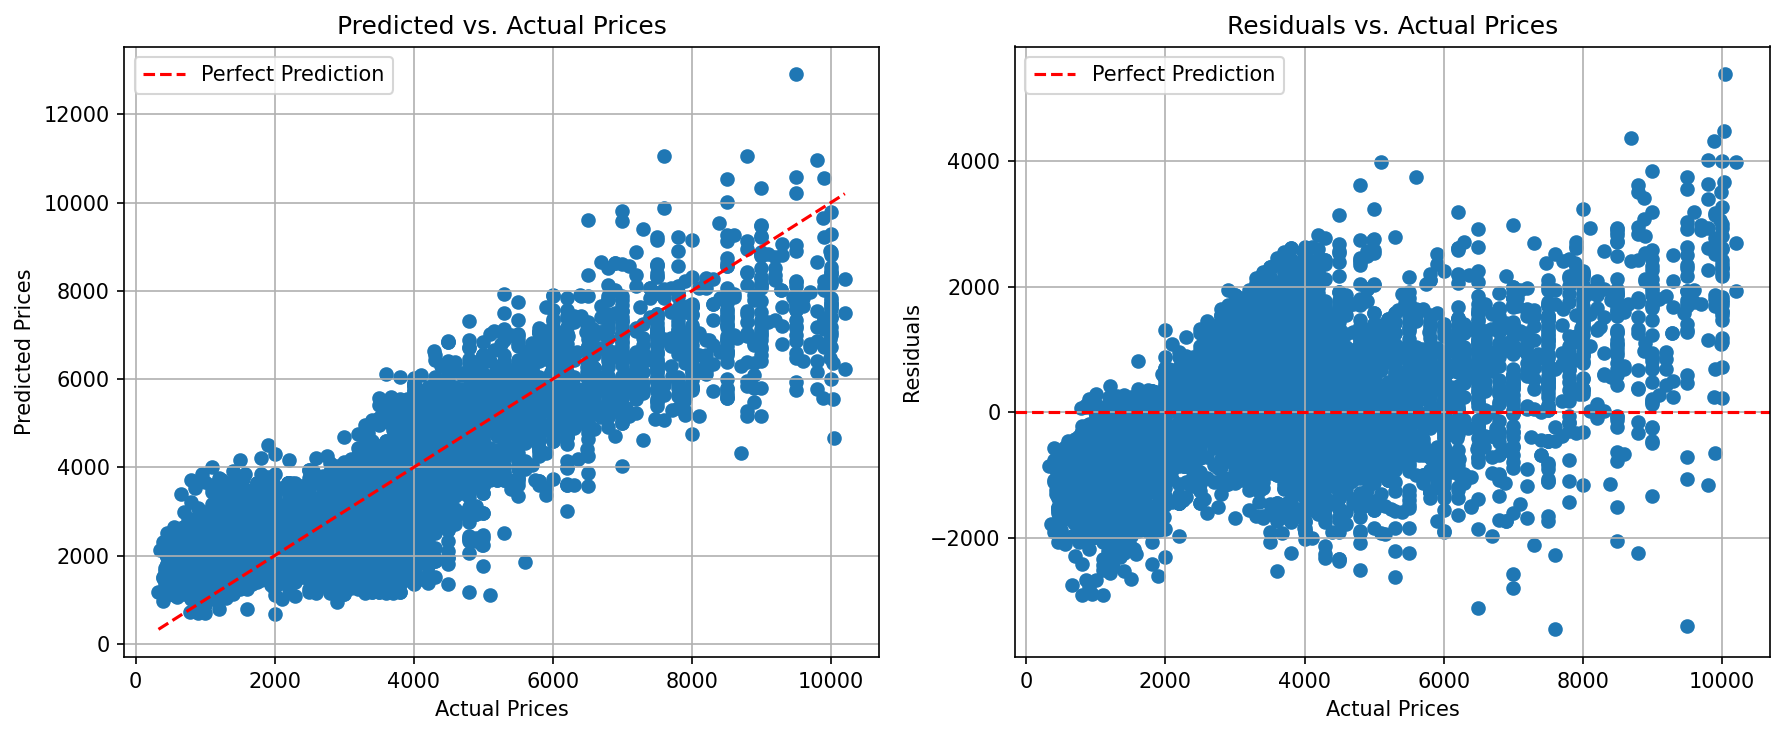

Model: Ridge
Outlier handling: OutlierHandlerIQR()
Lower cutoff: -3750 S$/month
Upper cutoff: 10250 S$/month
Rental price outliers based on 1.5 IQR: 3345
Rental price outliers based on 1.5 IQR: 420
{'model': 'Ridge', 'mae': 861.5, 'rmse': 1066.5, 'r2_score': 0.75}


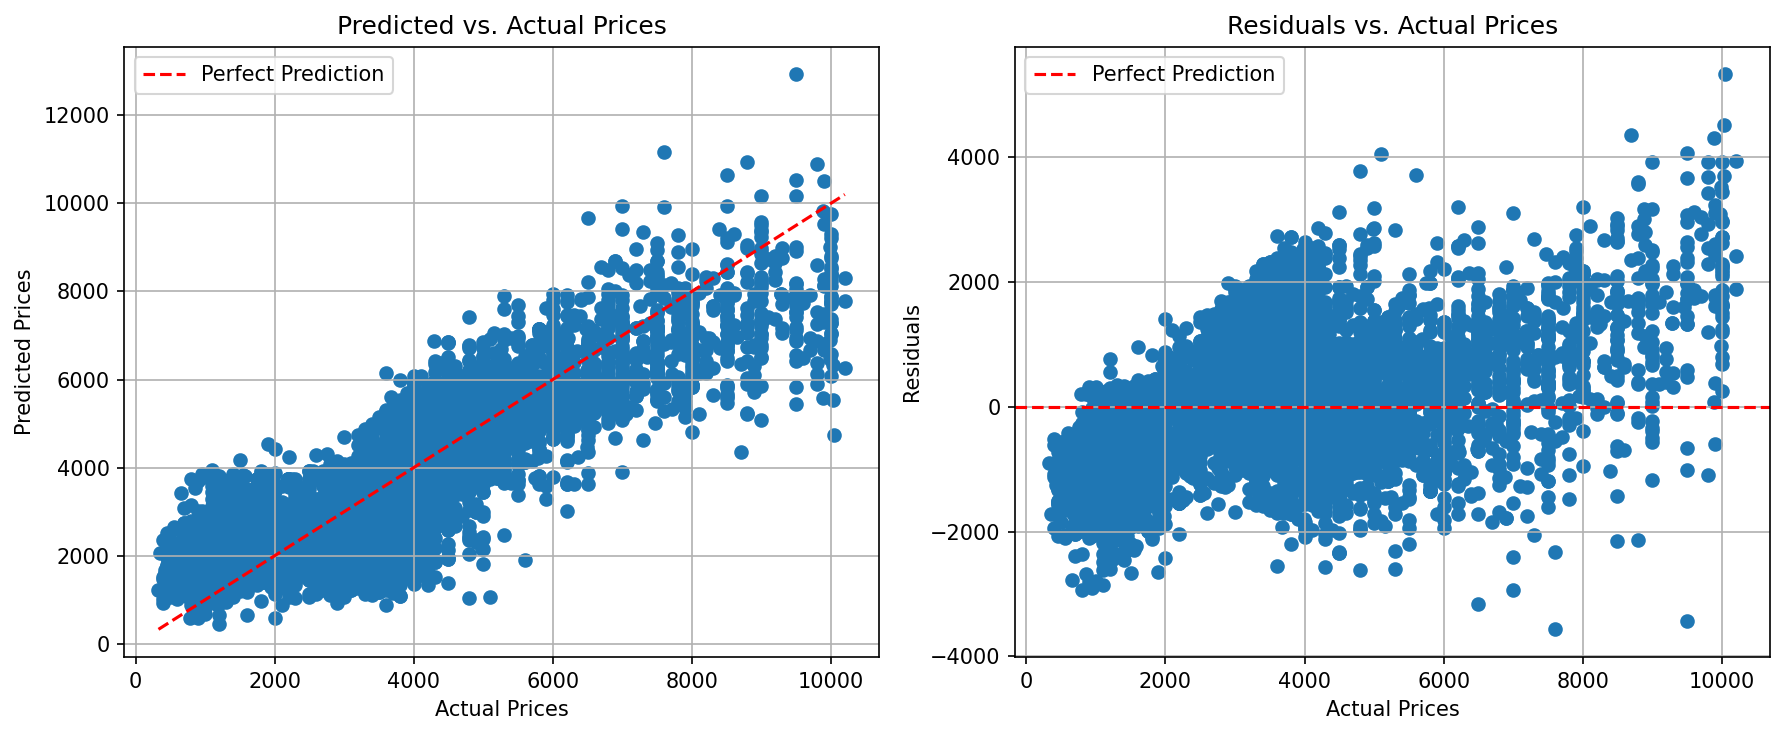

Model: DecisionTreeRegressor
Outlier handling: OutlierHandlerIQR()
Lower cutoff: -3750 S$/month
Upper cutoff: 10250 S$/month
Rental price outliers based on 1.5 IQR: 3345
Rental price outliers based on 1.5 IQR: 420
{'model': 'DecisionTreeRegressor', 'mae': 388.54, 'rmse': 695.02, 'r2_score': 0.89}


Model: RandomForestRegressor
Outlier handling: OutlierHandlerIQR()
Lower cutoff: -3750 S$/month
Upper cutoff: 10250 S$/month
Rental price outliers based on 1.5 IQR: 3345
Rental price outliers based on 1.5 IQR: 420
{'model': 'RandomForestRegressor', 'mae': 302.6, 'rmse': 500.83, 'r2_score': 0.94}


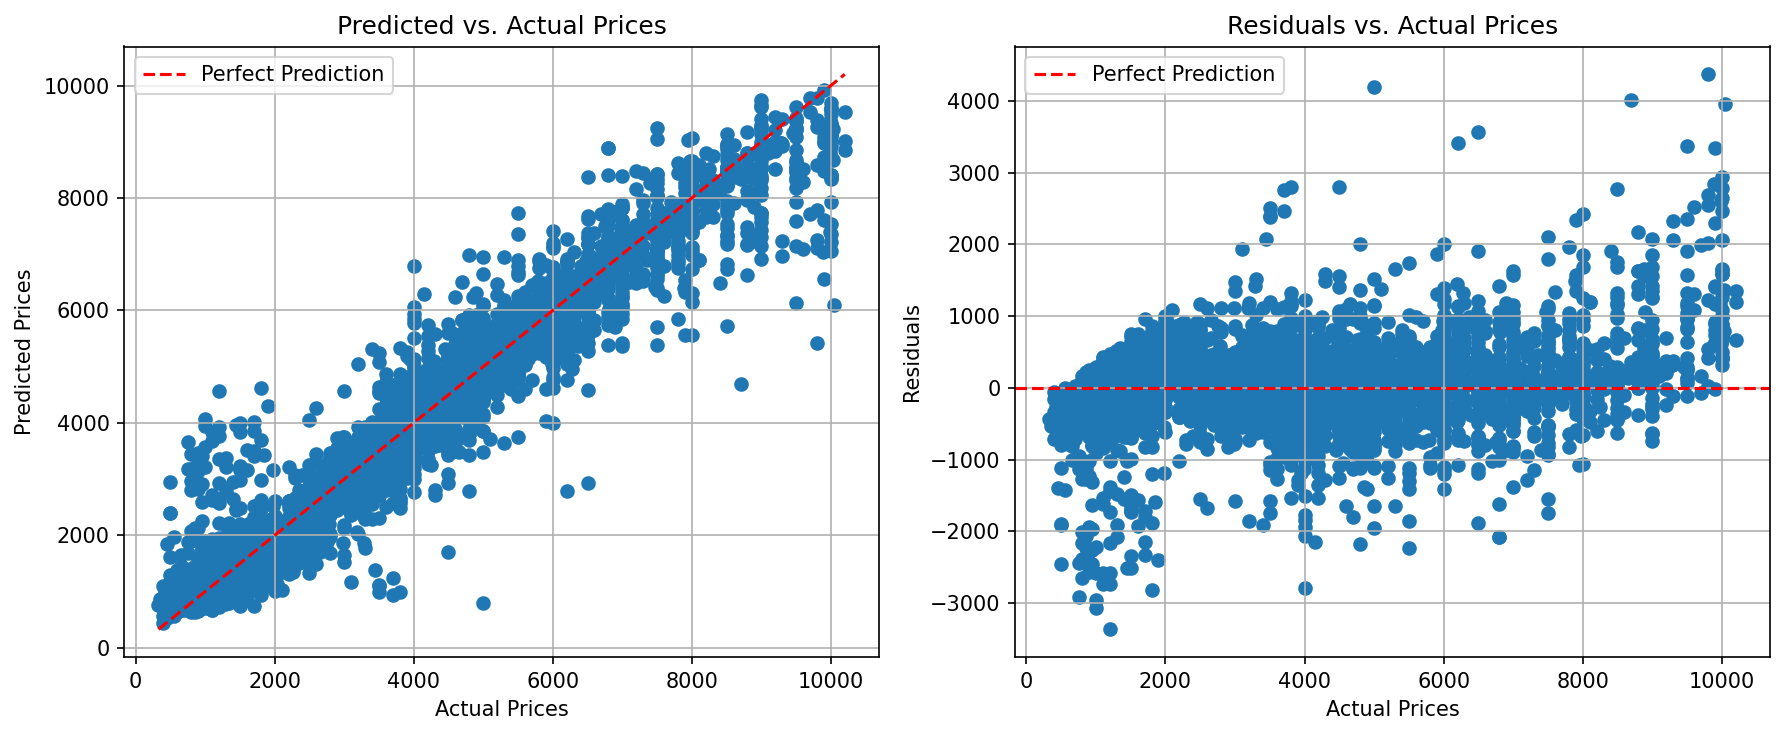

Model: AdaBoostRegressor
Outlier handling: OutlierHandlerIQR()
Lower cutoff: -3750 S$/month
Upper cutoff: 10250 S$/month
Rental price outliers based on 1.5 IQR: 3345
Rental price outliers based on 1.5 IQR: 420
{'model': 'AdaBoostRegressor', 'mae': 764.19, 'rmse': 966.5, 'r2_score': 0.79}


Model: HistGradientBoostingRegressor
Outlier handling: OutlierHandlerIQR()
Lower cutoff: -3750 S$/month
Upper cutoff: 10250 S$/month
Rental price outliers based on 1.5 IQR: 3345
Rental price outliers based on 1.5 IQR: 420
{'model': 'HistGradientBoostingRegressor', 'mae': 359.83, 'rmse': 553.98, 'r2_score': 0.93}


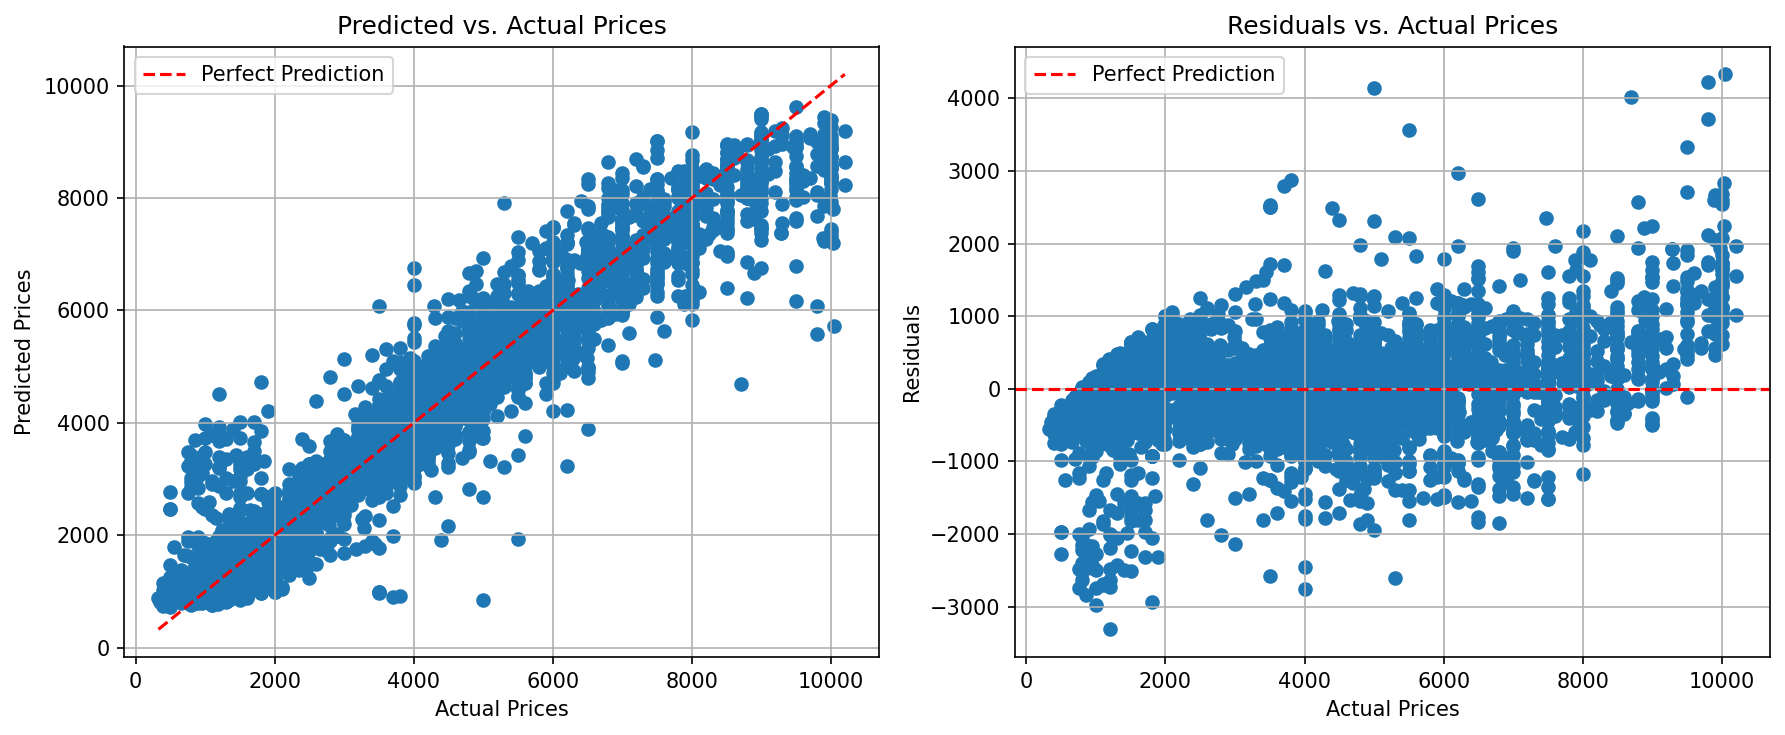

Model: XGBRegressor
Outlier handling: OutlierHandlerIQR()
Lower cutoff: -3750 S$/month
Upper cutoff: 10250 S$/month
Rental price outliers based on 1.5 IQR: 3345
Rental price outliers based on 1.5 IQR: 420
{'model': 'XGBRegressor', 'mae': 336.35, 'rmse': 524.22, 'r2_score': 0.94}


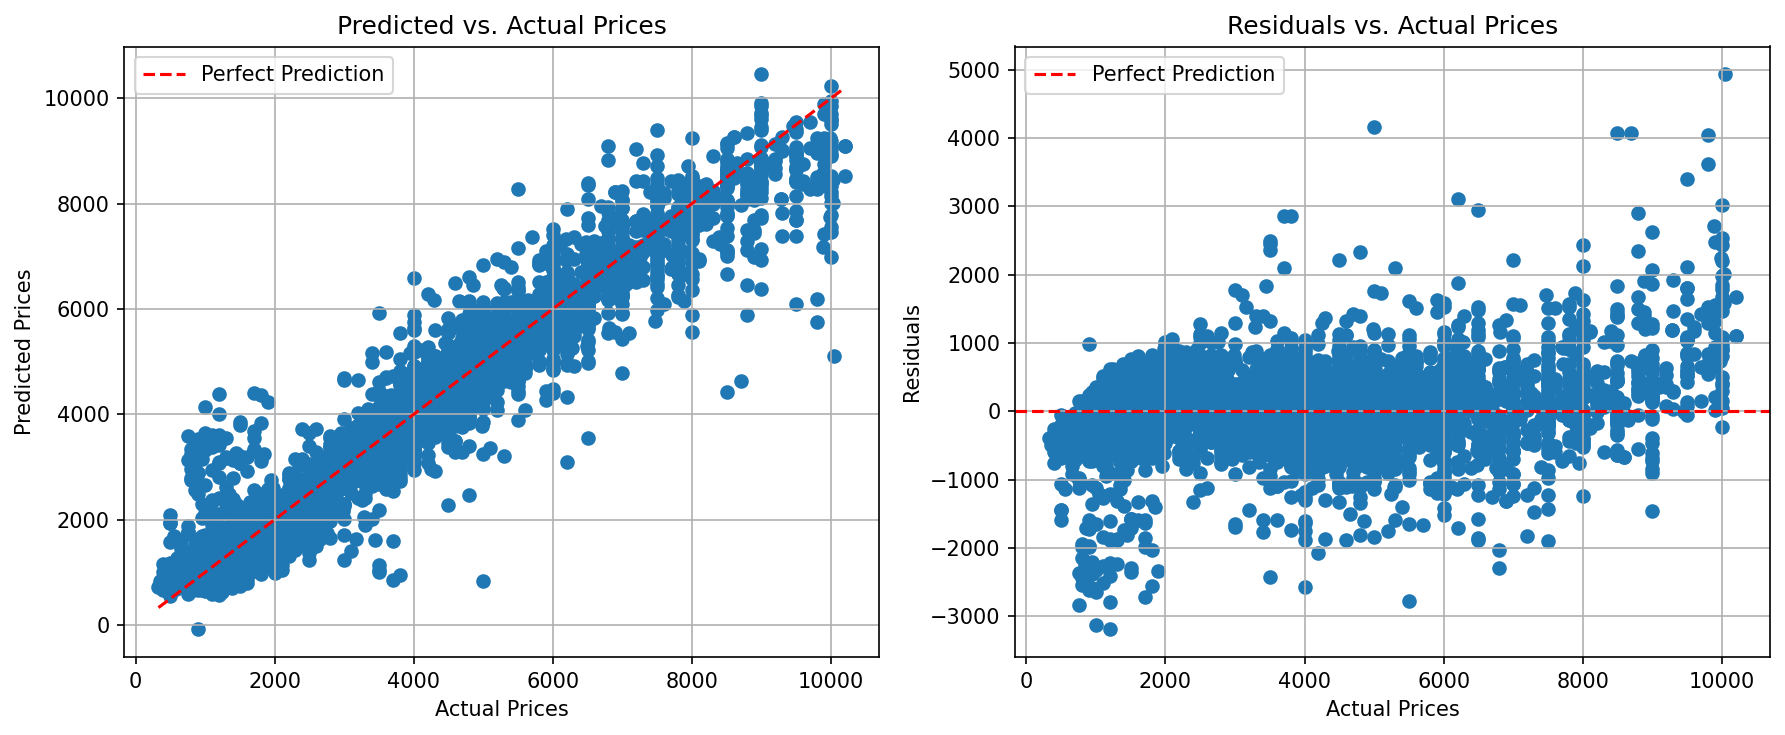

Model: CatBoostRegressor
Outlier handling: OutlierHandlerIQR()
Lower cutoff: -3750 S$/month
Upper cutoff: 10250 S$/month
Rental price outliers based on 1.5 IQR: 3345
Rental price outliers based on 1.5 IQR: 420
Learning rate set to 0.076157
0:	learn: 1978.3021829	total: 11.3ms	remaining: 11.3s
1:	learn: 1866.6367560	total: 20.1ms	remaining: 10.1s
2:	learn: 1763.7589047	total: 29.4ms	remaining: 9.79s
3:	learn: 1665.4609000	total: 39.7ms	remaining: 9.88s
4:	learn: 1577.9442733	total: 48.1ms	remaining: 9.56s
5:	learn: 1500.3559307	total: 58.3ms	remaining: 9.66s
6:	learn: 1427.6119306	total: 67.1ms	remaining: 9.51s
7:	learn: 1361.8628737	total: 77.7ms	remaining: 9.63s
8:	learn: 1301.6111121	total: 87.1ms	remaining: 9.6s
9:	learn: 1246.6948322	total: 97ms	remaining: 9.6s
10:	learn: 1199.4318015	total: 107ms	remaining: 9.59s
11:	learn: 1154.4355585	total: 115ms	remaining: 9.46s
12:	learn: 1112.2096911	total: 125ms	remaining: 9.5s
13:	learn: 1075.7132920	total: 134ms	remaining: 9.47s
14:	learn

Model: LGBMRegressor
Outlier handling: OutlierHandlerIQR()
Lower cutoff: -3750 S$/month
Upper cutoff: 10250 S$/month
Rental price outliers based on 1.5 IQR: 3345
Rental price outliers based on 1.5 IQR: 420
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1752
[LightGBM] [Info] Number of data points in the train set: 50804, number of used features: 79
[LightGBM] [Info] Start training from score 3481.088123
{'model': 'LGBMRegressor', 'mae': 358.6, 'rmse': 552.21, 'r2_score': 0.93}


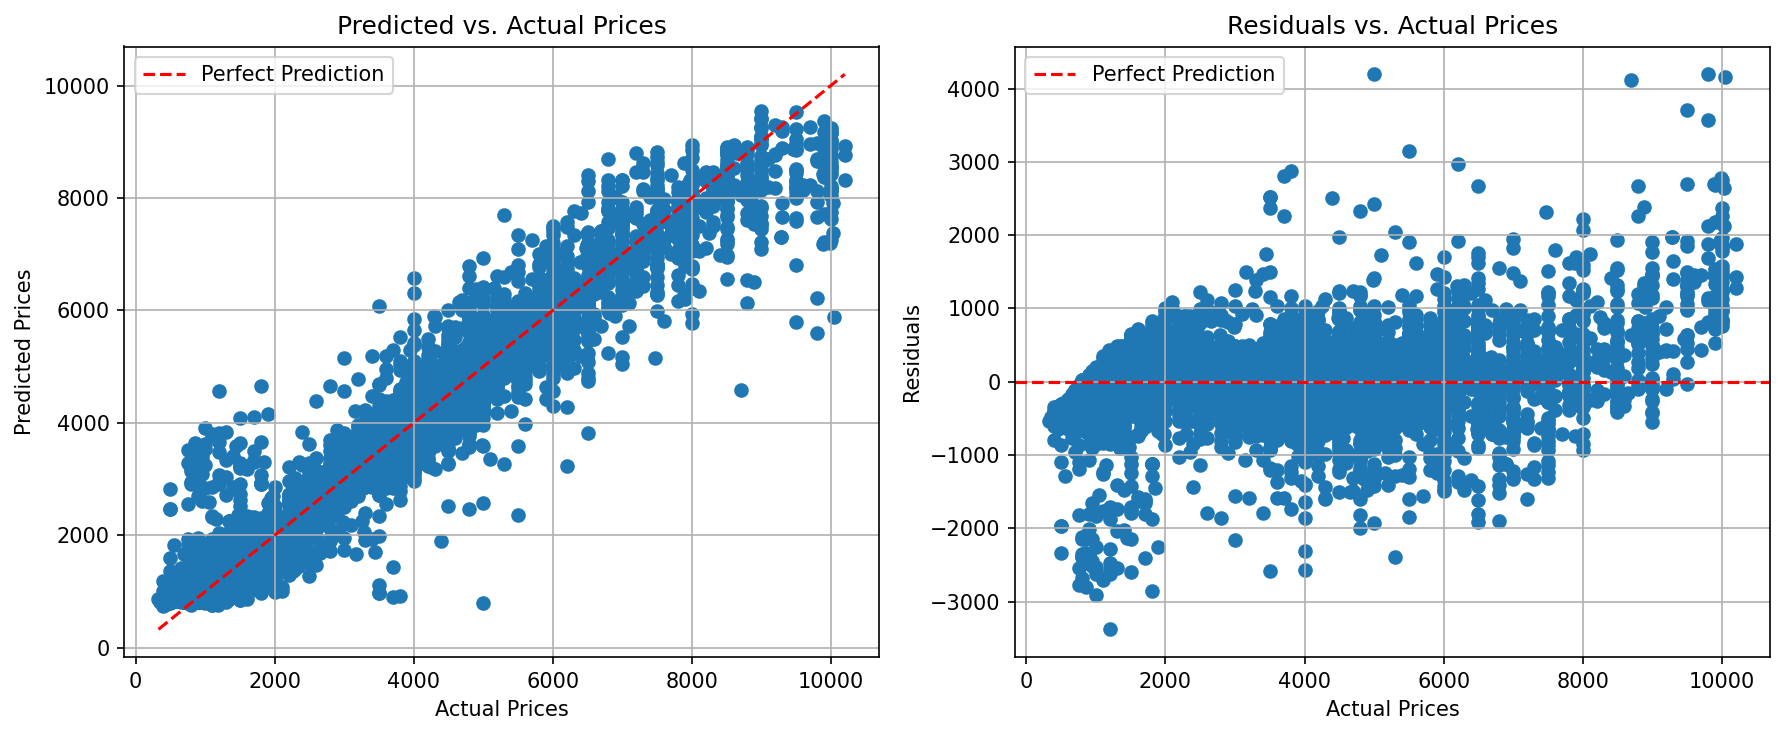

In [132]:
# Loop through each outlier handler
data = []
if not trained:
    for outlier_handler in outlier_handlers:
        # Loop through each model
        for model in models:
            # Print outlier handler and model
            print("=" * 100)
            print(f"Model: {model[1]}")
            print(f"Outlier handling: {outlier_handler}")
            
            # Remove outliers
            if outlier_handler is None:
                X_train_new, y_train_new = X_train.copy(), y_train.copy()
                X_val_new, y_val_new = X_val.copy(), y_val.copy()
            else:
                X_train_new, y_train_new = outlier_handler.fit_transform(X_train, y_train)
                X_val_new, y_val_new = outlier_handler.transform(X_val, y_val)

            # Create a pipeline
            pipeline = Pipeline(steps=[
                ("column_transformer", column_transformer),
                ("model", model[0])
            ])

            # Fit the pipeline on the training data
            pipeline.fit(X_train_new, y_train_new)
            
            # Predict on the validation data
            y_val_pred = pipeline.predict(X_val_new)
            
            model_metrics = get_metrics(model[1], y_val_new, y_val_pred)
            print(model_metrics)
            data.append({**model_metrics, **{'outlier_handler': outlier_handler.__class__.__name__}})
            
            # Create residual plots
            plot_residuals(y_val_new, y_val_pred)

In [133]:
evaluations = pd.DataFrame(data)

In [134]:
evaluations.sort_values(by=["model", "outlier_handler"], ascending=False, inplace=True)

In [135]:
evaluations[evaluations["outlier_handler"] != "NoneType"]

model      mae     rmse  r2_score  \
27                   XGBRegressor   336.35   524.22      0.94   
17                   XGBRegressor   507.84  1218.86      0.93   
22                          Ridge   861.50  1066.50      0.75   
12                          Ridge  1369.69  2381.35      0.74   
24          RandomForestRegressor   302.60   500.83      0.94   
14          RandomForestRegressor   446.89  1270.37      0.93   
20               LinearRegression   861.53  1067.29      0.75   
10               LinearRegression  1374.51  2373.07      0.74   
21                          Lasso   866.33  1068.91      0.75   
11                          Lasso  1376.74  2418.19      0.73   
29                  LGBMRegressor   358.60   552.21      0.93   
19                  LGBMRegressor   559.42  1278.95      0.93   
26  HistGradientBoostingRegressor   359.83   553.98      0.93   
16  HistGradientBoostingRegressor   558.82  1314.61      0.92   
23          DecisionTreeRegressor   388.54   695.02      0.89   
13          DecisionTreeRegressor   565.18  1770.66      0.86   
28              CatBoostRegressor   331.57   518.25      0.94   
18              CatBoostRegressor   519.13  1255.72      0.93   
25              AdaBoostRegressor   764.19   966.50      0.79   
15              AdaBoostRegressor  1428.94  2480.29      0.72   

            outlier_handler  
27        OutlierHandlerIQR  
17  OutlierHandler2Point5SD  
22        OutlierHandlerIQR  
12  OutlierHandler2Point5SD  
24        OutlierHandlerIQR  
14  OutlierHandler2Point5SD  
20        OutlierHandlerIQR  
10  OutlierHandler2Point5SD  
21        OutlierHandlerIQR  
11  OutlierHandler2Point5SD  
29        OutlierHandlerIQR  
19  OutlierHandler2Point5SD  
26        OutlierHandlerIQR  
16  OutlierHandler2Point5SD  
23        OutlierHandlerIQR  
13  OutlierHandler2Point5SD  
28        OutlierHandlerIQR  
18  OutlierHandler2Point5SD  
25        OutlierHandlerIQR  
15  OutlierHandler2Point5SD

In [136]:
# params = {
#     'iterations': 2250, 
#     'learning_rate': 0.05288423971308536, 
#     'depth': 10, 
#     'subsample': 0.7068924726325713, 
#     'colsample_bylevel': 0.8010693389144884, 
#     'min_data_in_leaf': 82
# }

# # Remove outliers
# outlier_handler_iqr = OutlierHandlerIQR()
# X_train_new, y_train_new = outlier_handler_iqr.fit_transform(X_train, y_train)

# X_train_new = column_transformer.fit_transform(X_train_new)

# catboost_final_model = CatBoostRegressor(**params)
# catboost_final_model.fit(X_train_new, y_train_new)

In [137]:
# Remove outliers in validation and test data
X_val_new, y_val_new = outlier_handler_iqr.transform(X_val, y_val)
X_test_new, y_test_new = outlier_handler_iqr.transform(X_test, y_test)

# Scale numerical columns and encode categorical columns in validation and test data
X_val_new = column_transformer.transform(X_val_new)
X_test_new = column_transformer.transform(X_test_new)

# Predict on the training, validation and test data
y_train_pred = catboost_final_model.predict(X_train_new)
y_val_pred = catboost_final_model.predict(X_val_new)
y_test_pred = catboost_final_model.predict(X_test_new)

# Calculate evaluation metrics on training data
rmse = np.sqrt(metrics.mean_squared_error(y_train_new, y_train_pred))
mape = metrics.mean_absolute_percentage_error(y_train_new, y_train_pred)
r2 = metrics.r2_score(y_train_new, y_train_pred)
print("=" * 40)
print("TRAINING DATA")
print(f"RMSE: {round(rmse, 2)}")
print(f"MAPE: {round(mape, 2)}")
print(f"R-squared (R²): {round(r2, 2)}")
print("=" * 40)

# Calculate evaluation metrics on validation data
rmse = np.sqrt(metrics.mean_squared_error(y_val_new, y_val_pred))
mape = metrics.mean_absolute_percentage_error(y_val_new, y_val_pred)
r2 = metrics.r2_score(y_val_new, y_val_pred)
print("VALIDATION DATA")
print(f"RMSE: {round(rmse, 2)}")
print(f"MAPE: {round(mape, 2)}")
print(f"R-squared (R²): {round(r2, 2)}")
print("=" * 40)

# Calculate evaluation metrics on test data
mae = metrics.mean_absolute_error(y_test_new, y_test_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test_new, y_test_pred))
mape = metrics.mean_absolute_percentage_error(y_test_new, y_test_pred)
r2 = metrics.r2_score(y_test_new, y_test_pred)
print("TEST DATA")
print(f"RMSE: {round(rmse, 2)}")
print(f"MAPE: {round(mape, 2)}")
print(f"R-squared (R²): {round(r2, 2)}")

NameError: name 'outlier_handler_iqr' is not defined

In [67]:
with open("../streamlit/static/column_transformer.pkl", "wb") as file:
    pickle.dump(column_transformer, file)

In [68]:
with open("../streamlit/static/catboost.pkl", "wb") as model_file:
    pickle.dump(catboost_final_model, model_file)

In [ ]:
# estimators = [
#     ('random_forest', RandomForestRegressor()),
#     ('history_gradient', XGBRegressor())
# ]
# reg = StackingRegressor(
#     estimators=estimators,
#     final_estimator=MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000)
# )
# reg.fit(X_train_1, y_train)
# y_pred = reg.predict(X_test_1)
# model_results = {}
# model_results['mae'] = metrics.mean_absolute_error(y_test, y_pred)
# model_results['mse'] = metrics.mean_squared_error(y_test, y_pred)
# model_results['accuracy'] = metrics.explained_variance_score(y_test, y_pred)
# print(model_results)

In [ ]:
exit()

# Hyperparameter tuning

In [ ]:
X_train_2 = column_transformer.fit_transform(X_train)

ValueError: Specifying the columns using strings is only supported for dataframes.

: 

In [ ]:
# Create a random forest model
rf = RandomForestRegressor(random_state=42)

# Define hyperparameter grid 
rf_param_grid = {
    "n_estimators": [200, 300, 400, 500],               
    "max_depth": [20, 30, 40, 50],              
    "max_features": [0.33, 0.5, 0.66, 1]                
}

# Create a grid search object
rf_grid_search = GridSearchCV(estimator=rf, 
                              param_grid=rf_param_grid, 
                              cv=5, 
                              n_jobs=5,
                              scoring="neg_root_mean_squared_error",
                              verbose=4)

# Fit the grid search to the training data
rf_grid_search.fit(X_train_2, y_train)

: 

In [ ]:
# Create grid search results dataframe with validation score (RMSE) and parameter values
rf_grid_search_results = pd.DataFrame({"validation_rmse": -1 * rf_grid_search.cv_results_["mean_test_score"], 
                                       "parameters": rf_grid_search.cv_results_["params"]}) 

# Extract each parameter as a separate column
rf_grid_search_results["n_estimators"] = rf_grid_search_results["parameters"].apply(lambda x: x["n_estimators"])
rf_grid_search_results["max_depth"] = rf_grid_search_results["parameters"].apply(lambda x: x["max_depth"])
rf_grid_search_results["max_features"] = rf_grid_search_results["parameters"].apply(lambda x: x["max_features"])

# Delete the parameters column
rf_grid_search_results = rf_grid_search_results.drop("parameters", axis=1)

# Show the top 10 best performing models
rf_grid_search_results.sort_values("validation_rmse")[:10]

In [ ]:
# Create XGBoost model
xgb = XGBRegressor(random_state=42)

# Define hyperparameter grid 
xgb_param_grid = {
    "n_estimators": [100, 200, 300, 400, 500],               
    "max_depth": [3, 4, 5], 
    "subsample": [0.8, 0.9, 1.0],
    "colsample_bytree": [0.8, 0.9, 1.0],  
    "learning_rate": [0.01, 0.1],
    "min_child_weight": [1, 2, 3],
    "gamma": [0, 0.1, 0.2],           
}

# Create a grid search object
xgb_grid_search = GridSearchCV(estimator=xgb,
                               param_grid=xgb_param_grid, 
                               cv=5, 
                               n_jobs=5,
                               scoring="neg_root_mean_squared_error",
                               verbose=3)

# Fit the grid search to the training data
xgb_grid_search.fit(X_train_2, y_train)

In [ ]:
# Create grid search results dataframe with validation score (RMSE) and parameter values
xgb_grid_search_results = pd.DataFrame({"validation_rmse": -1 * xgb_grid_search.cv_results_["mean_test_score"], 
                                       "parameters": xgb_grid_search.cv_results_["params"]}) 

# Extract each parameter as a separate column
xgb_grid_search_results["n_estimators"] = xgb_grid_search_results["parameters"].apply(lambda x: x["n_estimators"])
xgb_grid_search_results["max_depth"] = xgb_grid_search_results["parameters"].apply(lambda x: x["max_depth"])
xgb_grid_search_results["subsample"] = xgb_grid_search_results["parameters"].apply(lambda x: x["subsample"])
xgb_grid_search_results["colsample_bytree"] = xgb_grid_search_results["parameters"].apply(lambda x: x["colsample_bytree"])
xgb_grid_search_results["learning_rate"] = xgb_grid_search_results["parameters"].apply(lambda x: x["learning_rate"])
xgb_grid_search_results["min_child_weight"] = xgb_grid_search_results["parameters"].apply(lambda x: x["min_child_weight"])
xgb_grid_search_results["gamma"] = xgb_grid_search_results["parameters"].apply(lambda x: x["gamma"])

# Delete the parameters column
xgb_grid_search_results = xgb_grid_search_results.drop("parameters", axis=1)

# Show the top 10 best performing models
xgb_grid_search_results.sort_values("validation_rmse")[:10]

# Final model

In [ ]:
def xgboost_tuned(X_train, y_train, X_test, y_test):
    model_results = {}
    model = XGBRegressor(
        n_estimators=500,
        max_depth=5,
        subsample=1.0,
        colsample_bytree=0.9,
        learning_rate=0.1,
        min_child_weight=1,
        gamma=0.1
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_results['model'] = 'XGBoost'
    model_results['mae'] = metrics.mean_absolute_error(y_test, y_pred)
    model_results['mse'] = metrics.mean_squared_error(y_test, y_pred)
    model_results['accuracy'] = metrics.explained_variance_score(y_test, y_pred)
    return model_results

In [ ]:
X_train_3 = column_transformer.fit_transform(X_train)

# For the test dataset, you do not need to use fit again, as we are using the mean and variance from the train dataset
X_test_3 = column_transformer.transform(X_test)

In [ ]:
model_xgboost_tuned = xgboost_tuned(X_train_3, y_train, X_test_3, y_test)

In [ ]:
model_xgboost_tuned

In [ ]:
def random_forest_tuned(X_train, y_train, X_test, y_test):
    model_results = {}
    model = RandomForestRegressor(
        n_estimators=200,
        max_depth=30,
        max_features=0.5
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_results['model'] = 'Random Forest'
    model_results['mae'] = metrics.mean_absolute_error(y_test, y_pred)
    model_results['mse'] = metrics.mean_squared_error(y_test, y_pred)
    model_results['accuracy'] = metrics.explained_variance_score(y_test, y_pred)
    return model_results

In [ ]:
model_random_forest_tuned = random_forest_tuned(X_train_3, y_train, X_test_3, y_test)

In [ ]:
model_random_forest_tuned